### About

This notebook runs the Multiclass K-Trees model using the LSST-like dataset of Pan-STARRS, GALEX, and AllWISE. It uses the magntiude columns and redshift, and derives colors based off of adjacent columns. It filters down to classes that have at least 6 samples total. We assume that any less will be insufficient for gaining patterns. 

Scroll down and see the resulting plots from this analysis.



Constructing Class Hierarchy Tree...
Node: Ia Pec has already been assigned parent: I Pec
Node: Ia-02cx has already been assigned parent: Ia
Node: Ia-HV has already been assigned parent: Ia
Node: Ib has already been assigned parent: I
Node: Ic has already been assigned parent: I
Node: Ia/c has already been assigned parent: Ia
Node: II P-97D has already been assigned parent: II Pec
Node: IIn P has already been assigned parent: II P
Node: IIn L has already been assigned parent: II L
Node: IIn Pec has already been assigned parent: II Pec
Node: TDE has already been assigned parent: TTypes

Data Filters
------------------
num_runs : 1
test_on_train : False
folds : 3
data_split : 0.3
top_classes : None
one_all : None
subsample : None
transform_features : True
transform_labels : False
incl_redshift : True
min_class_size : 6
pca : None
test_level : 3

Features
------------------
Total: 11
GALEXAIS_FUV, GALEXAIS_NUV, AllWISE_W1mag, AllWISE_W2mag, AllWISE_W3mag, AllWISE_W4mag, PS1_gmag, PS1_rm

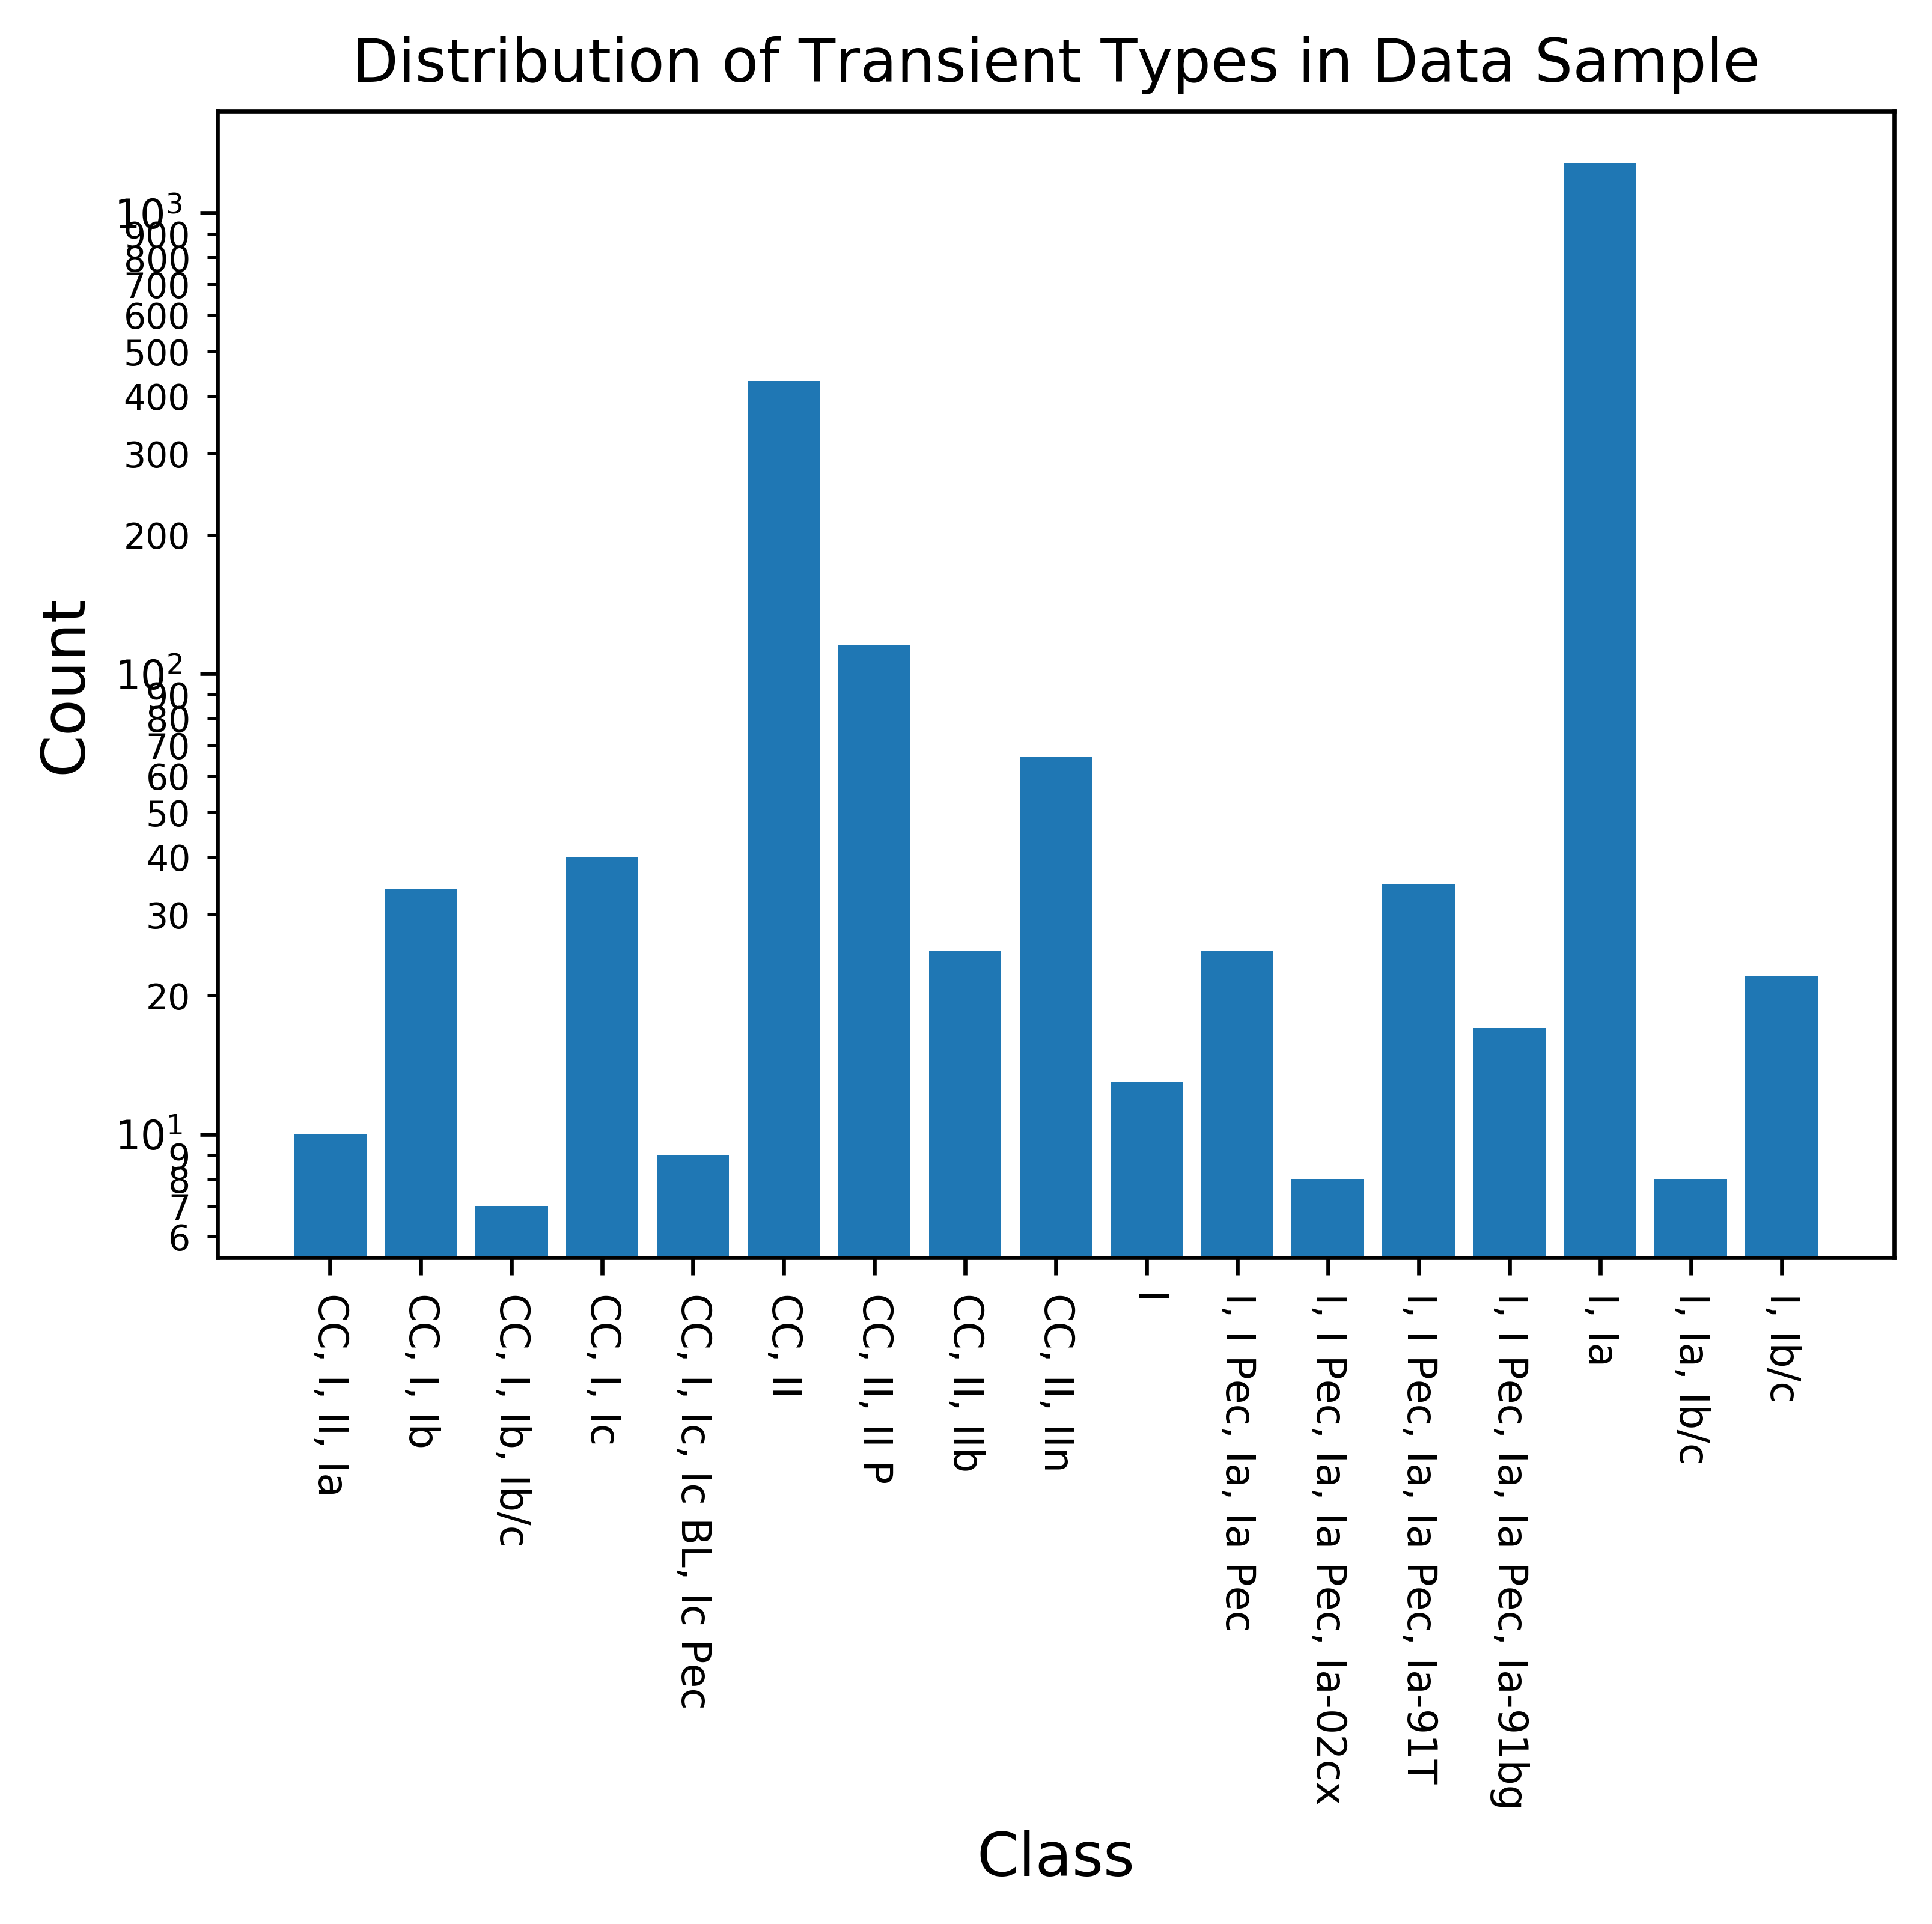

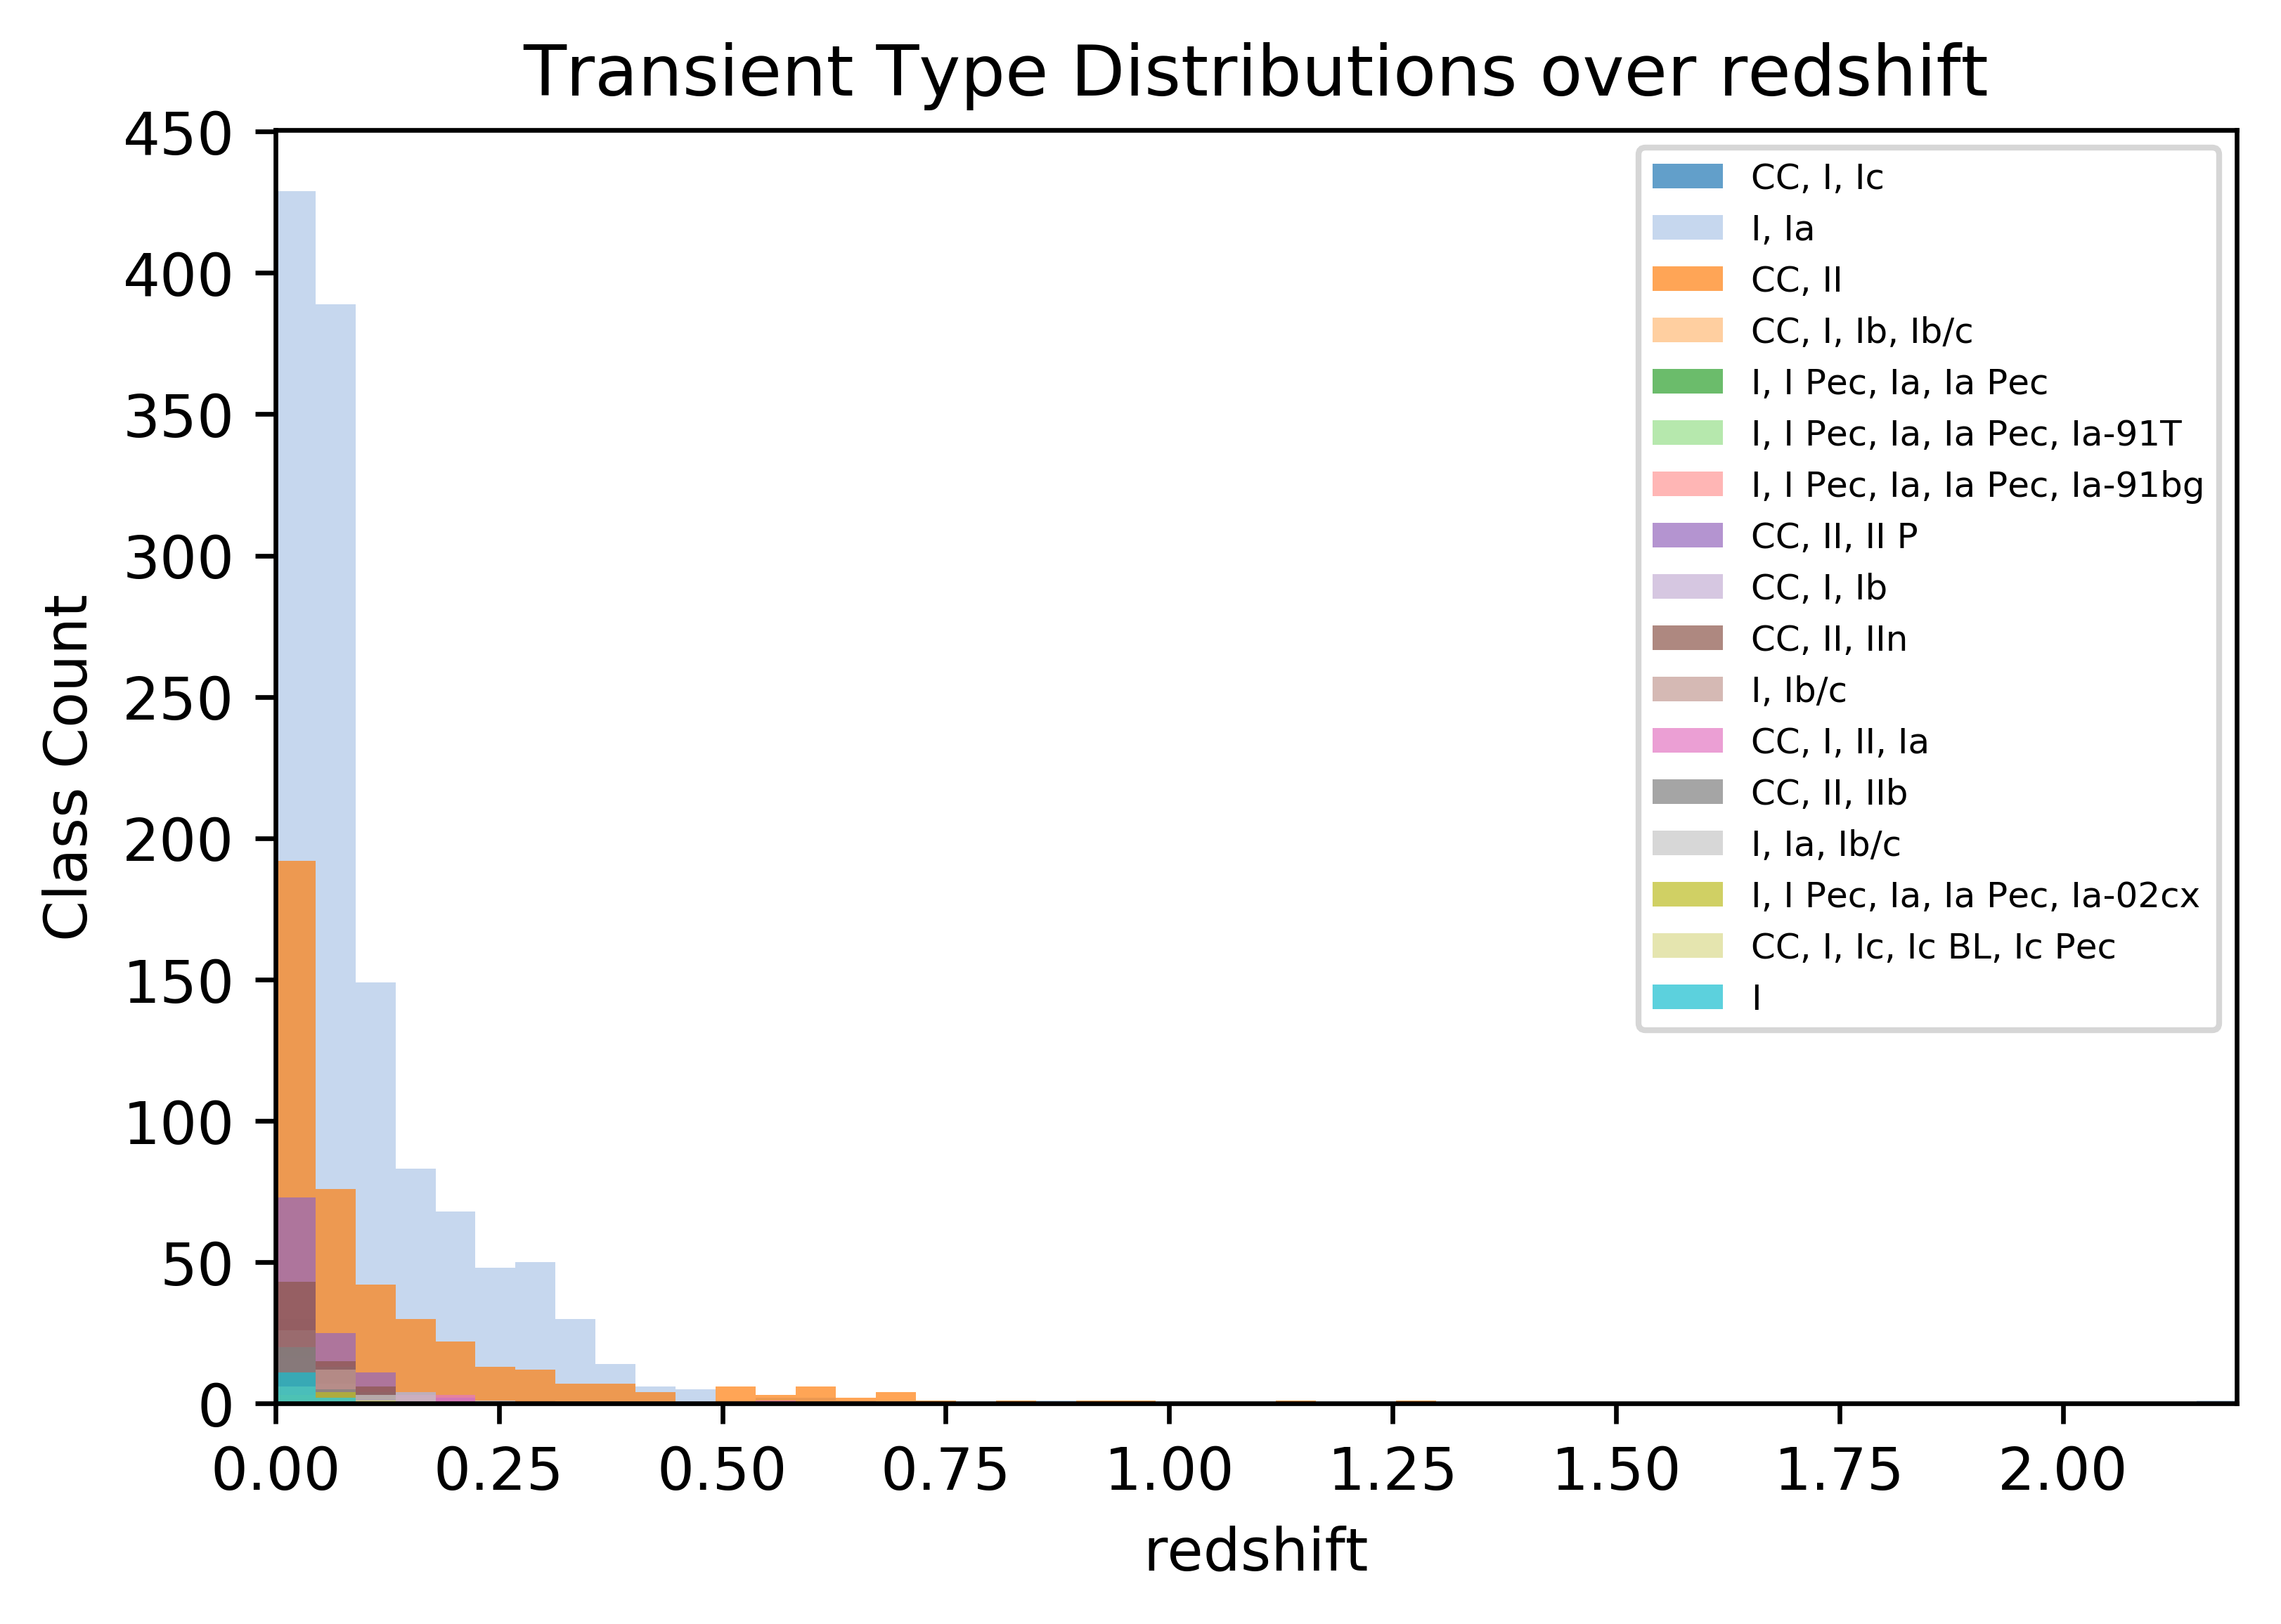



Run 1
No model for Undefined_CC


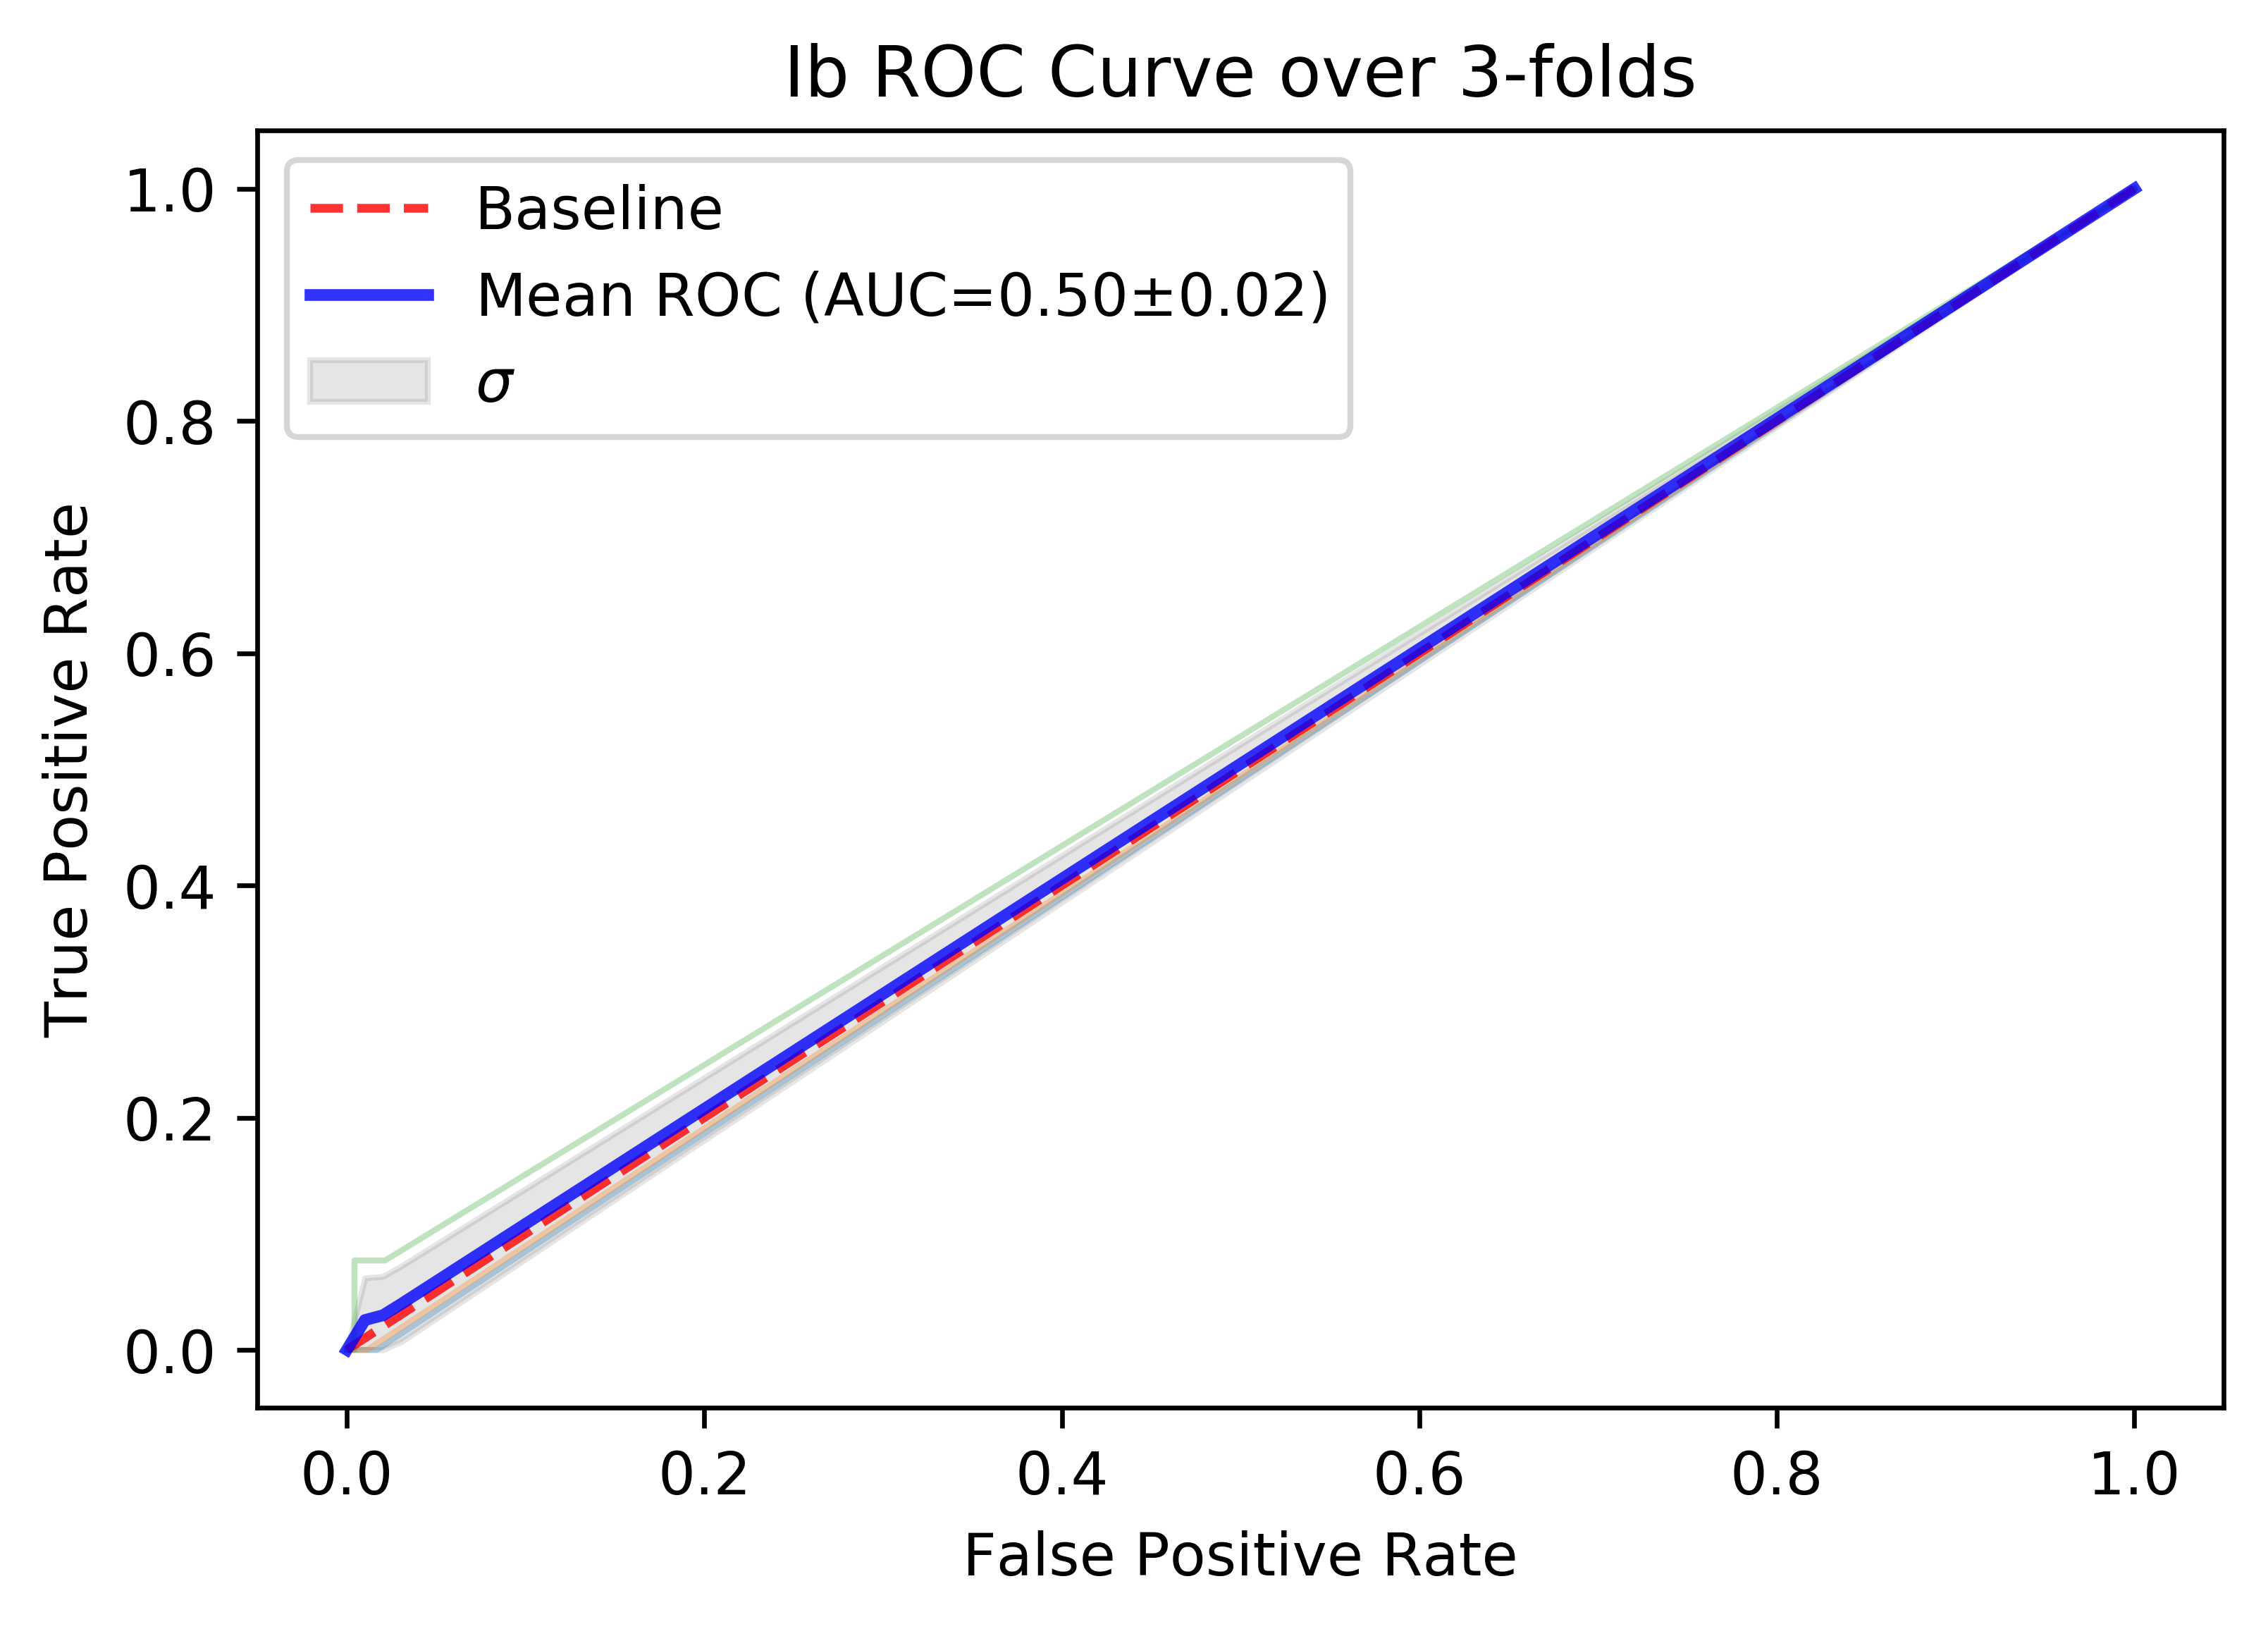

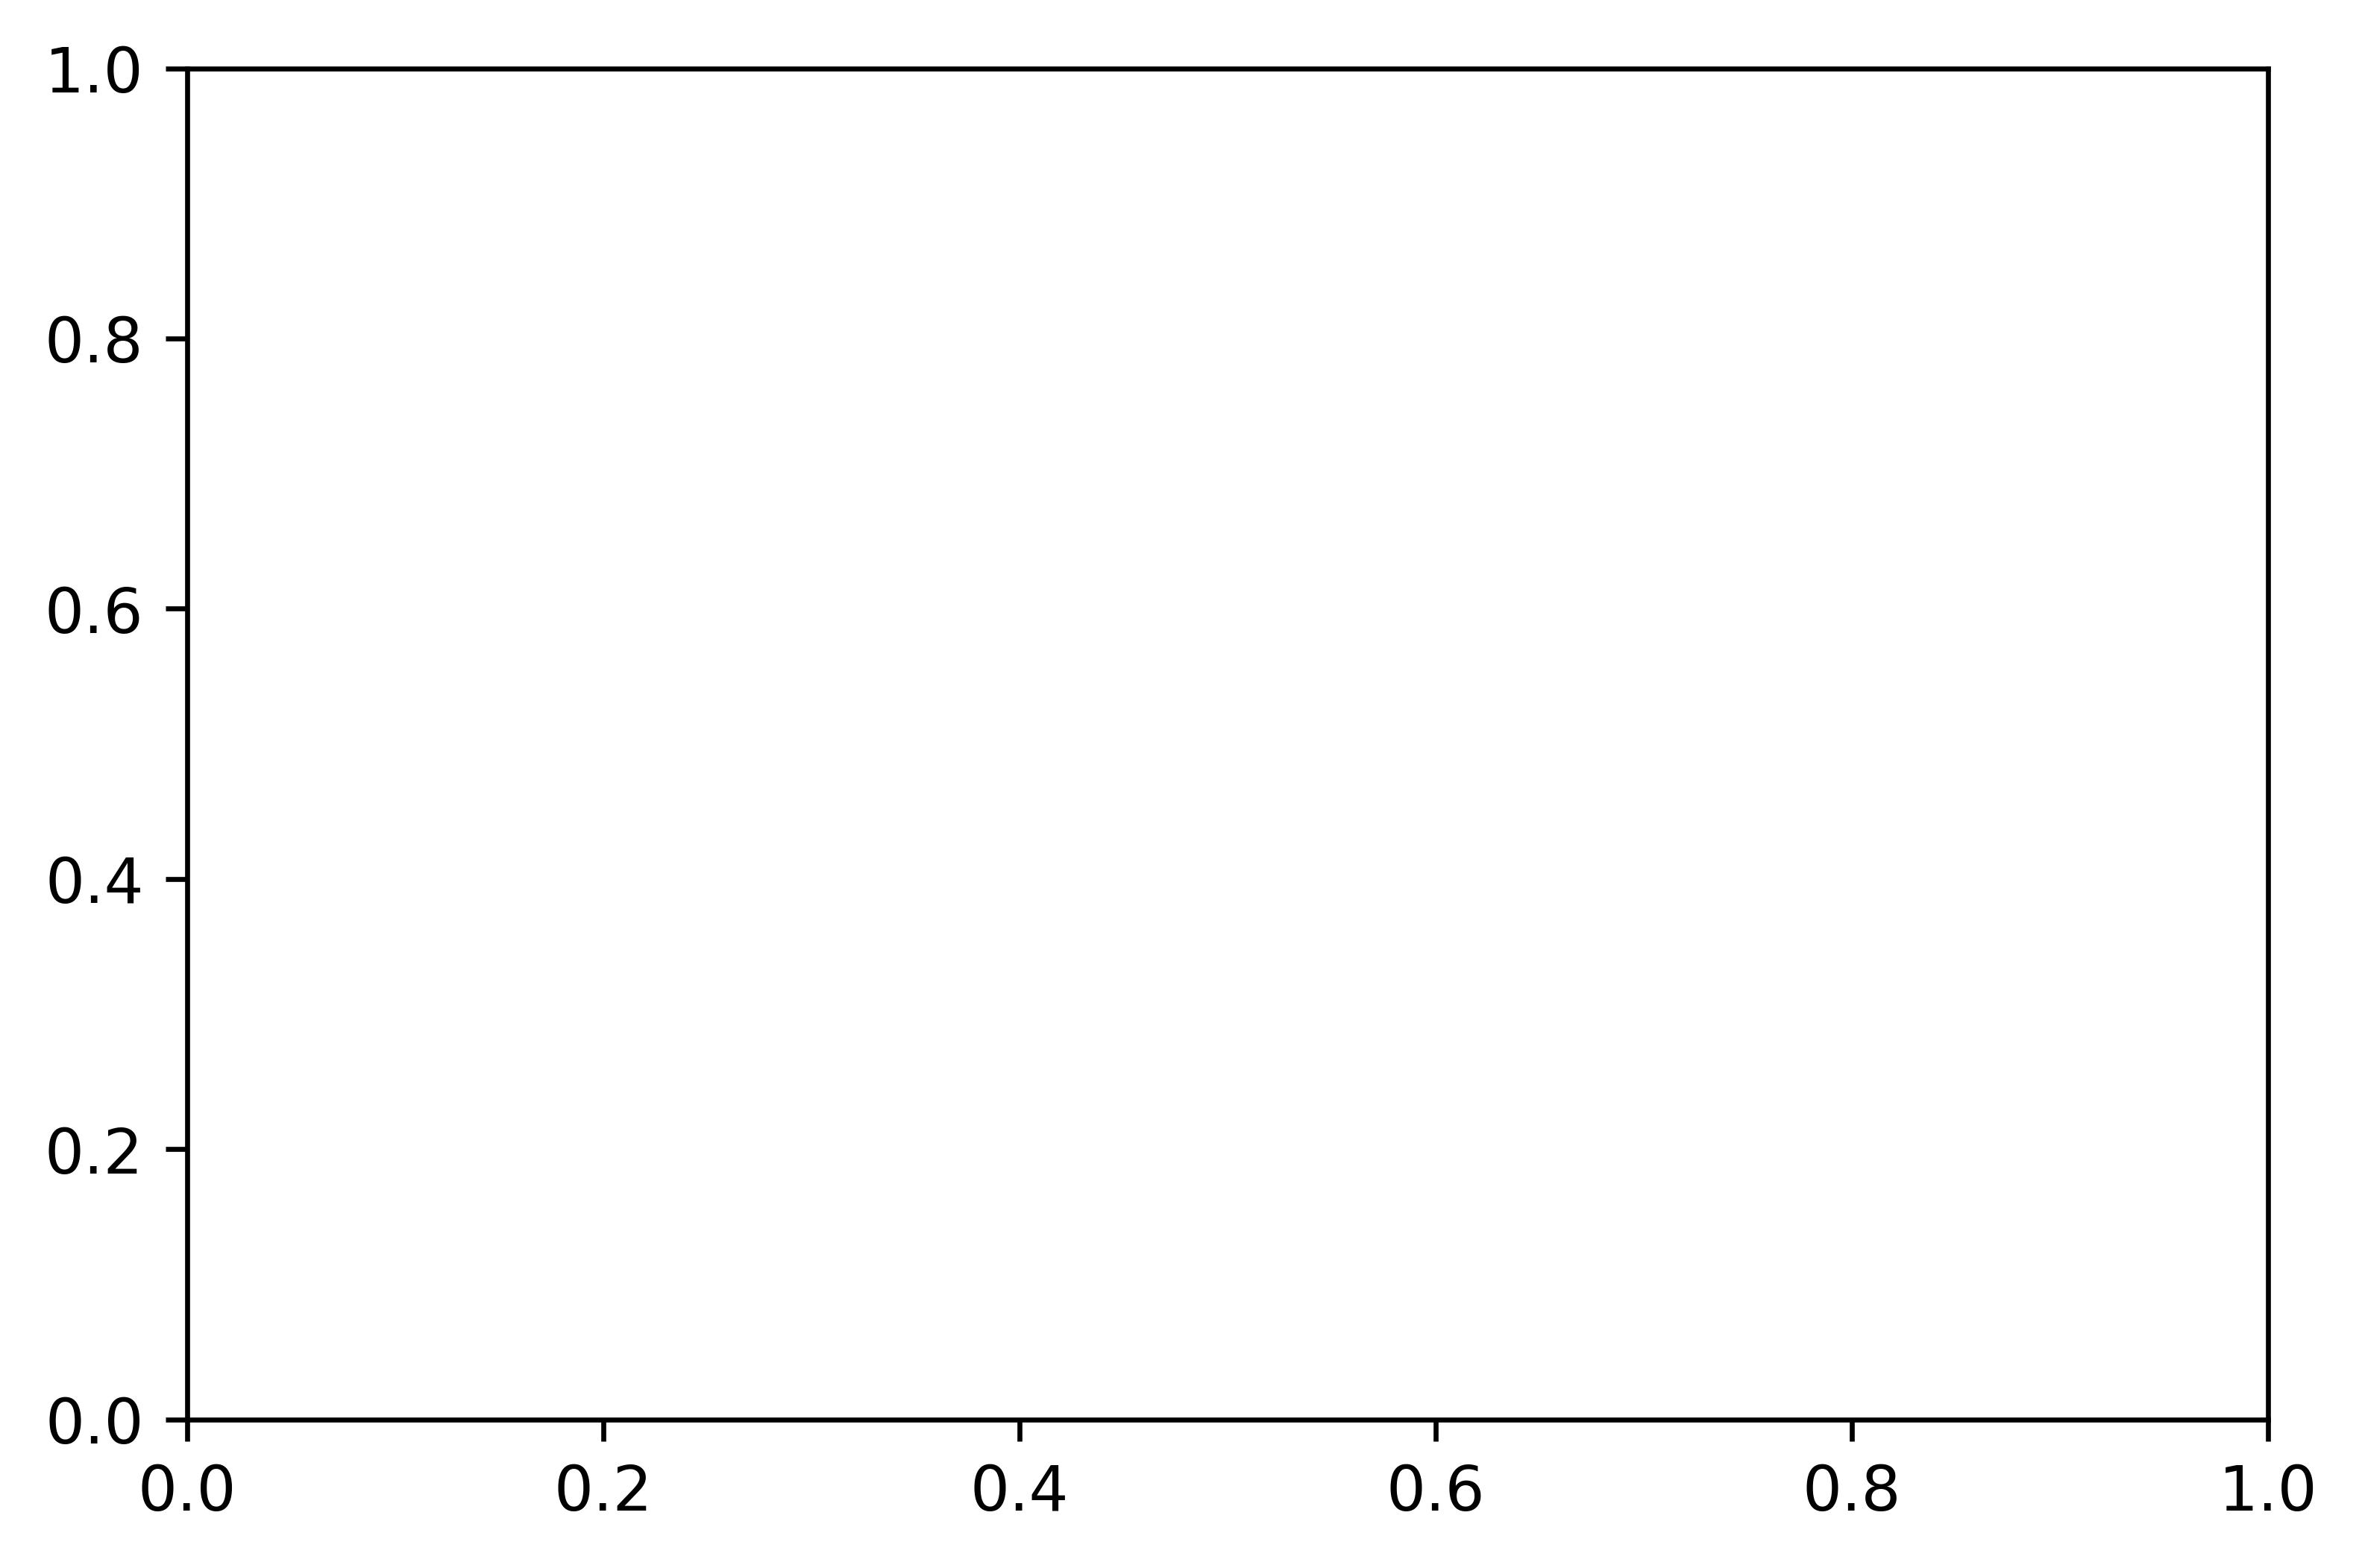

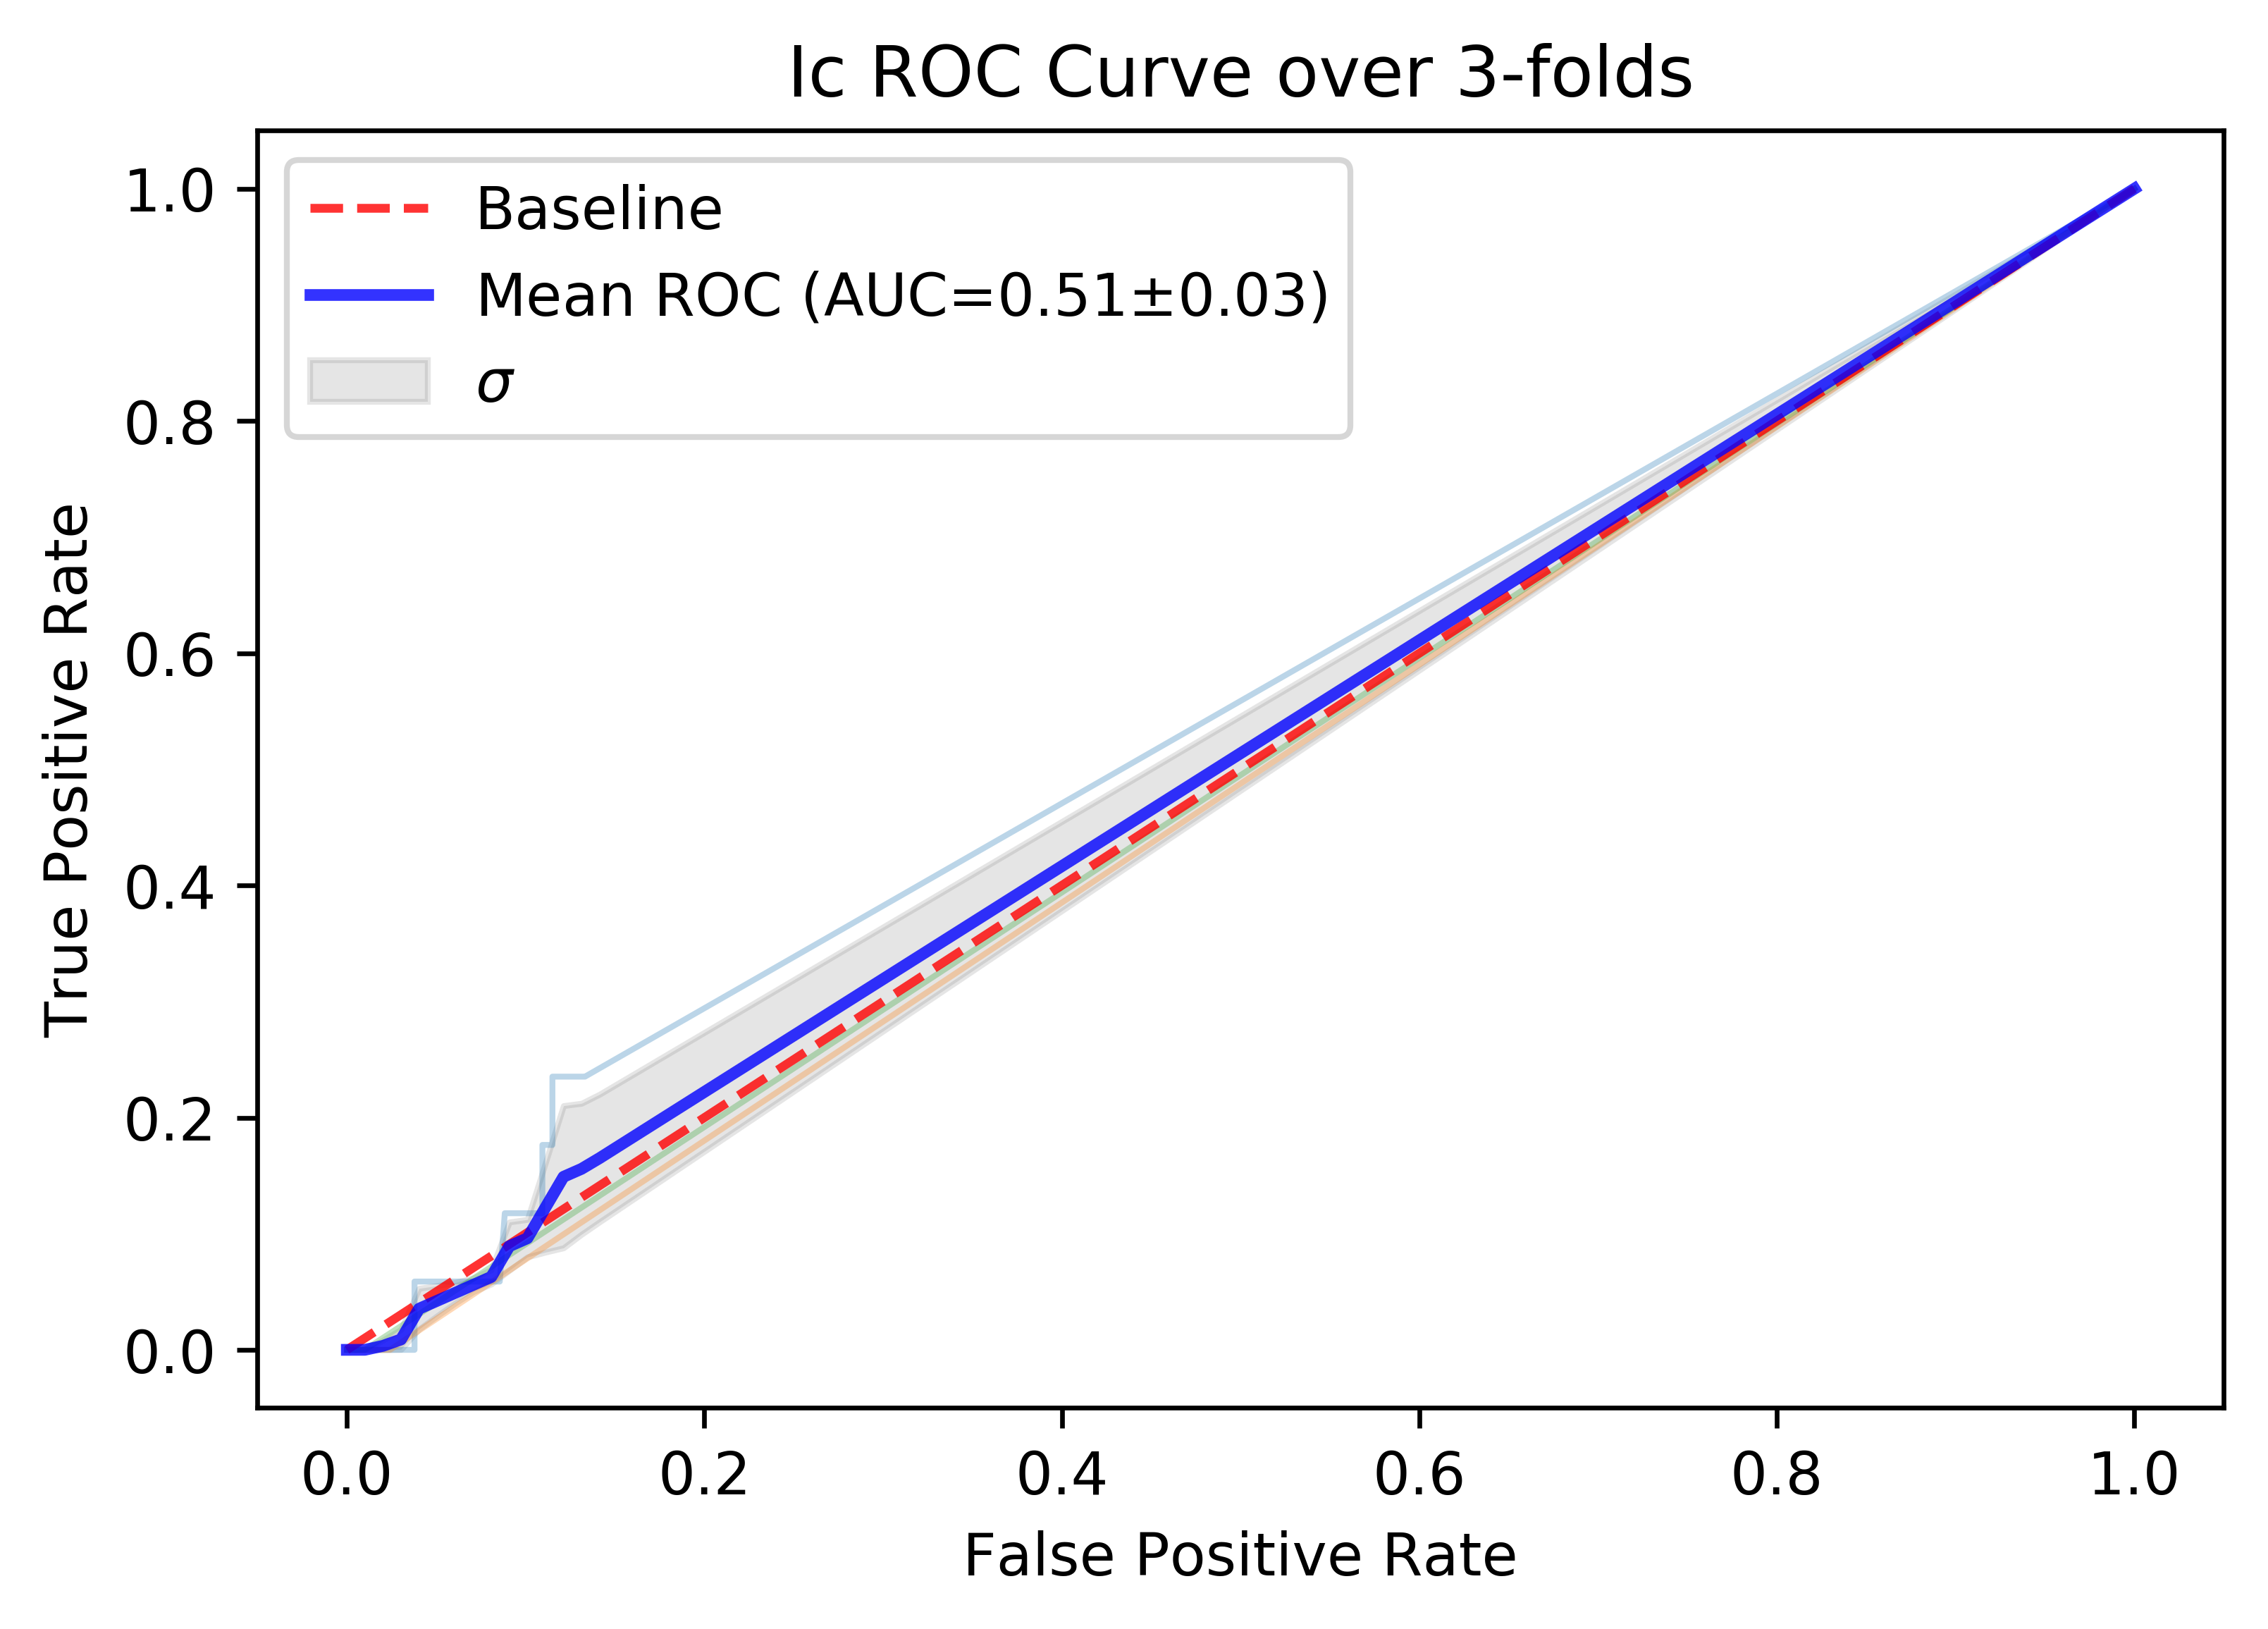

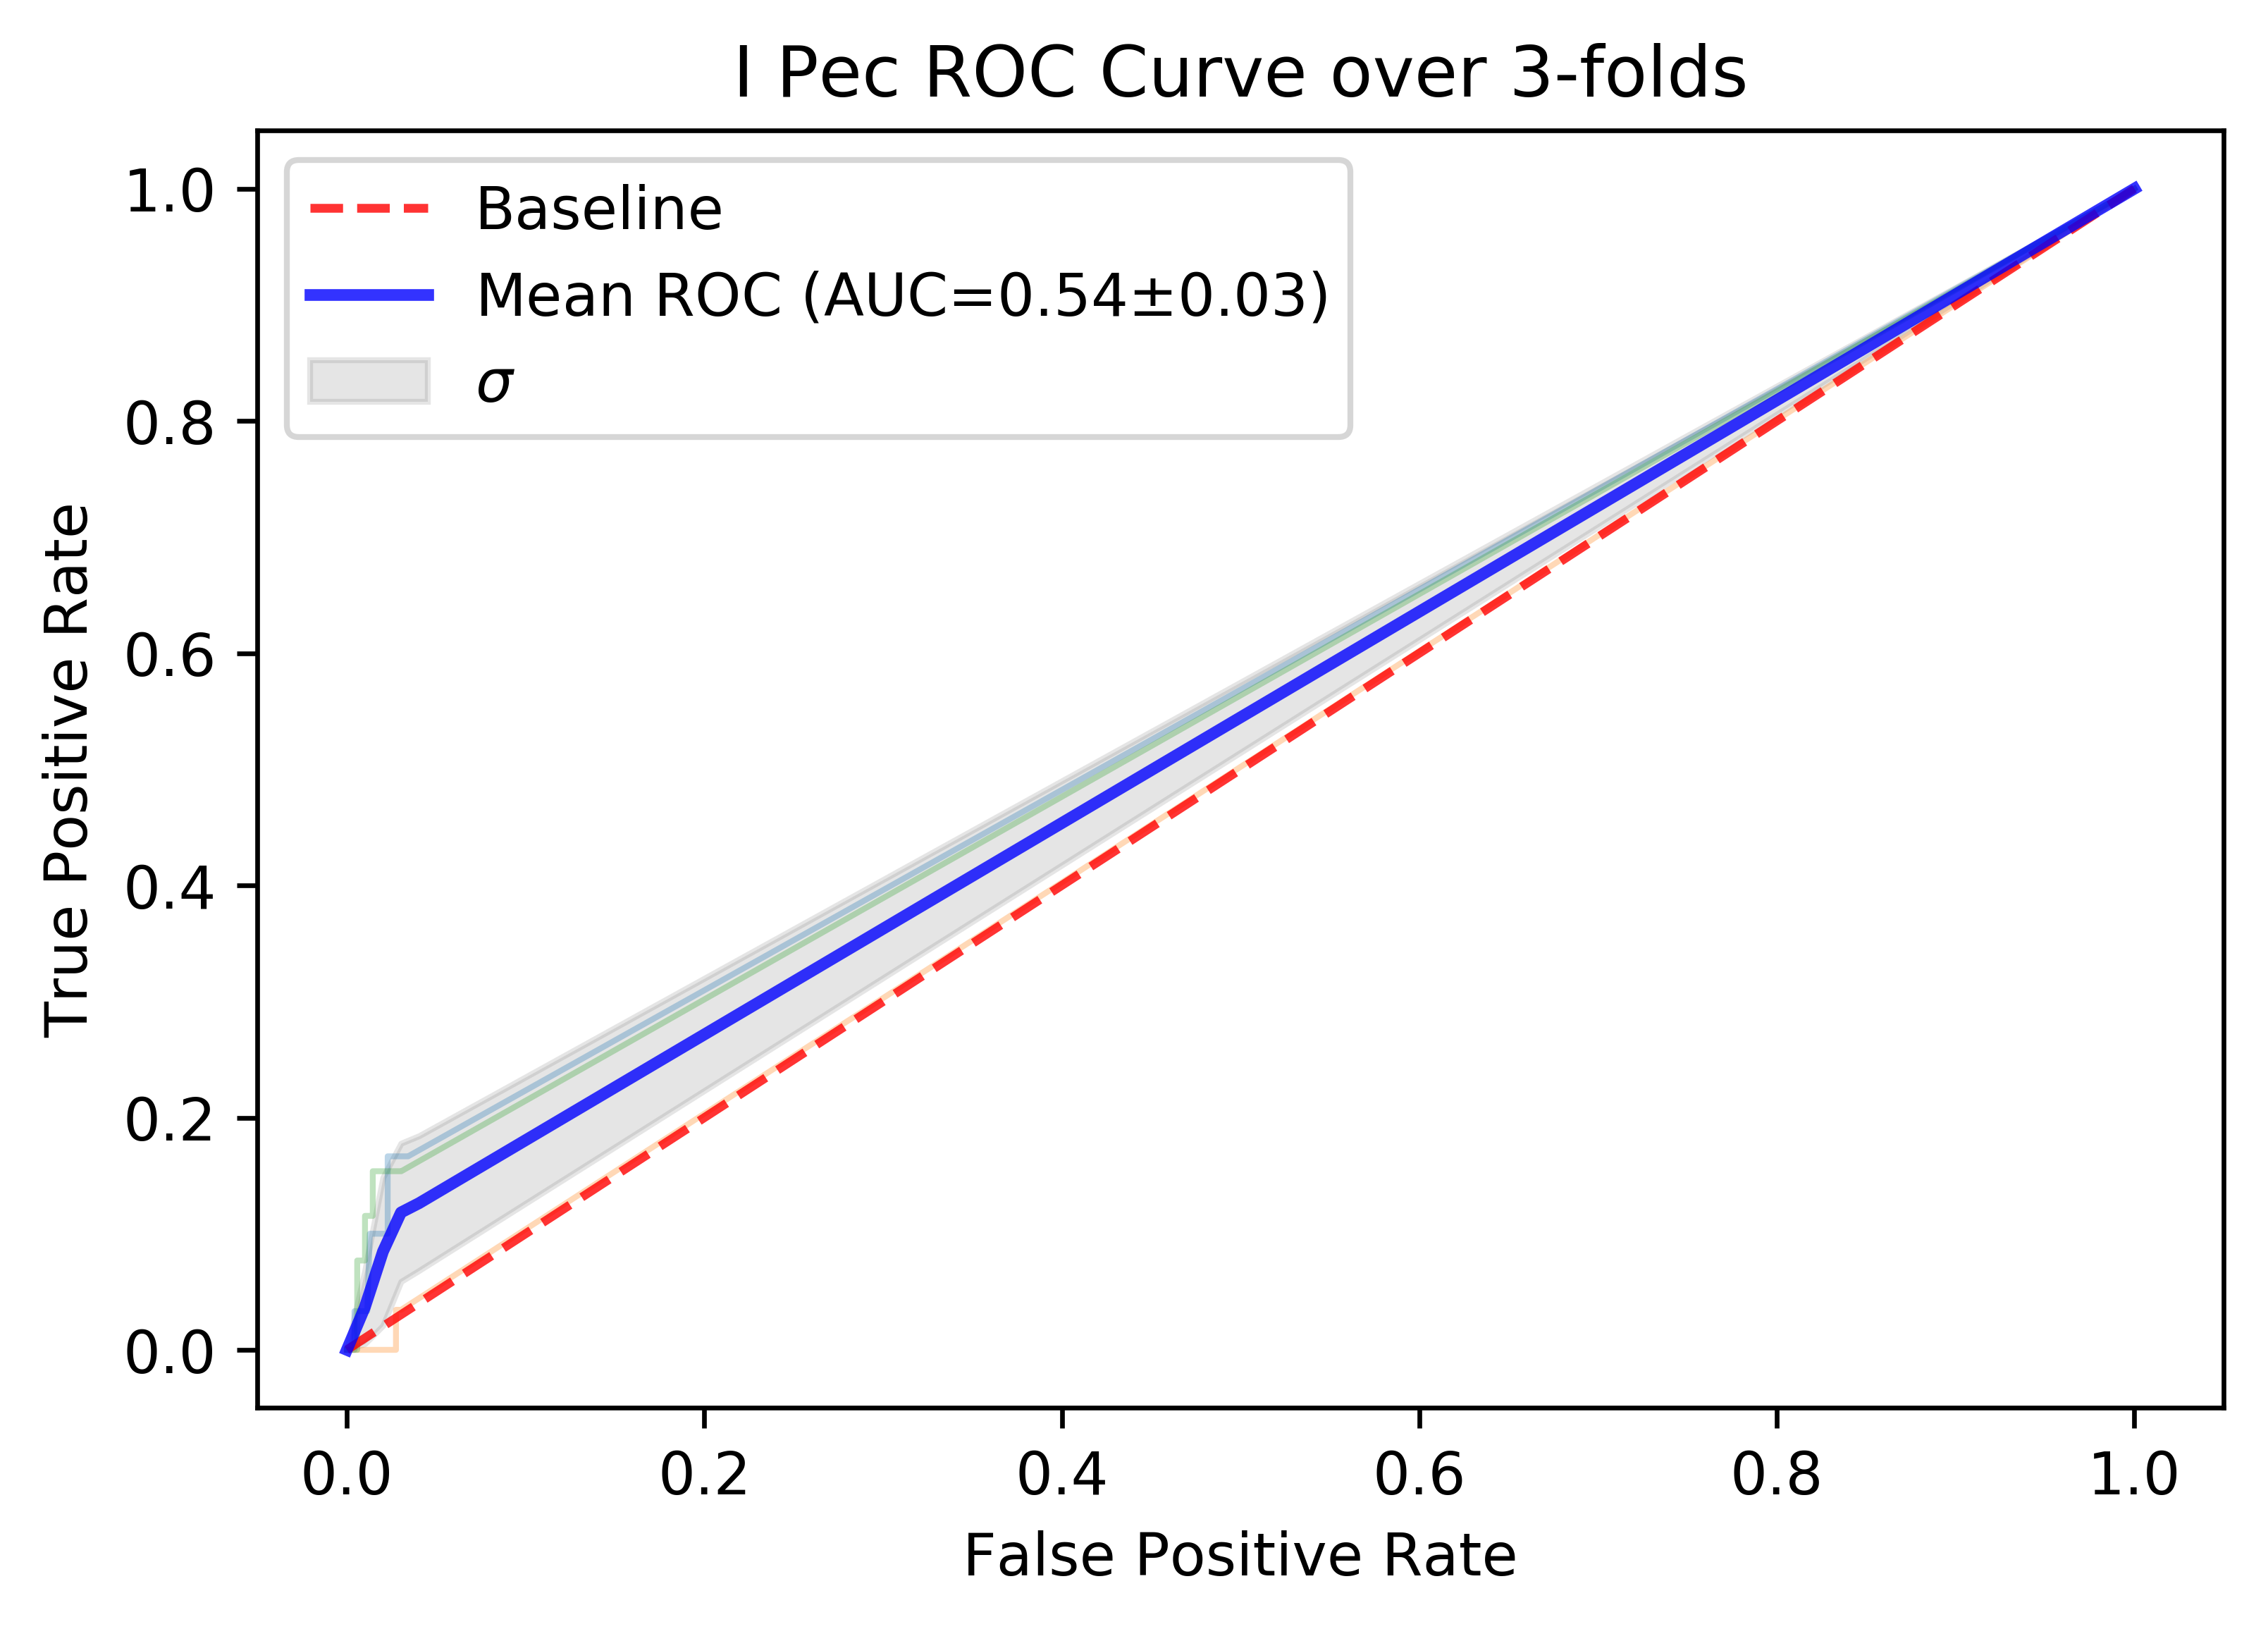

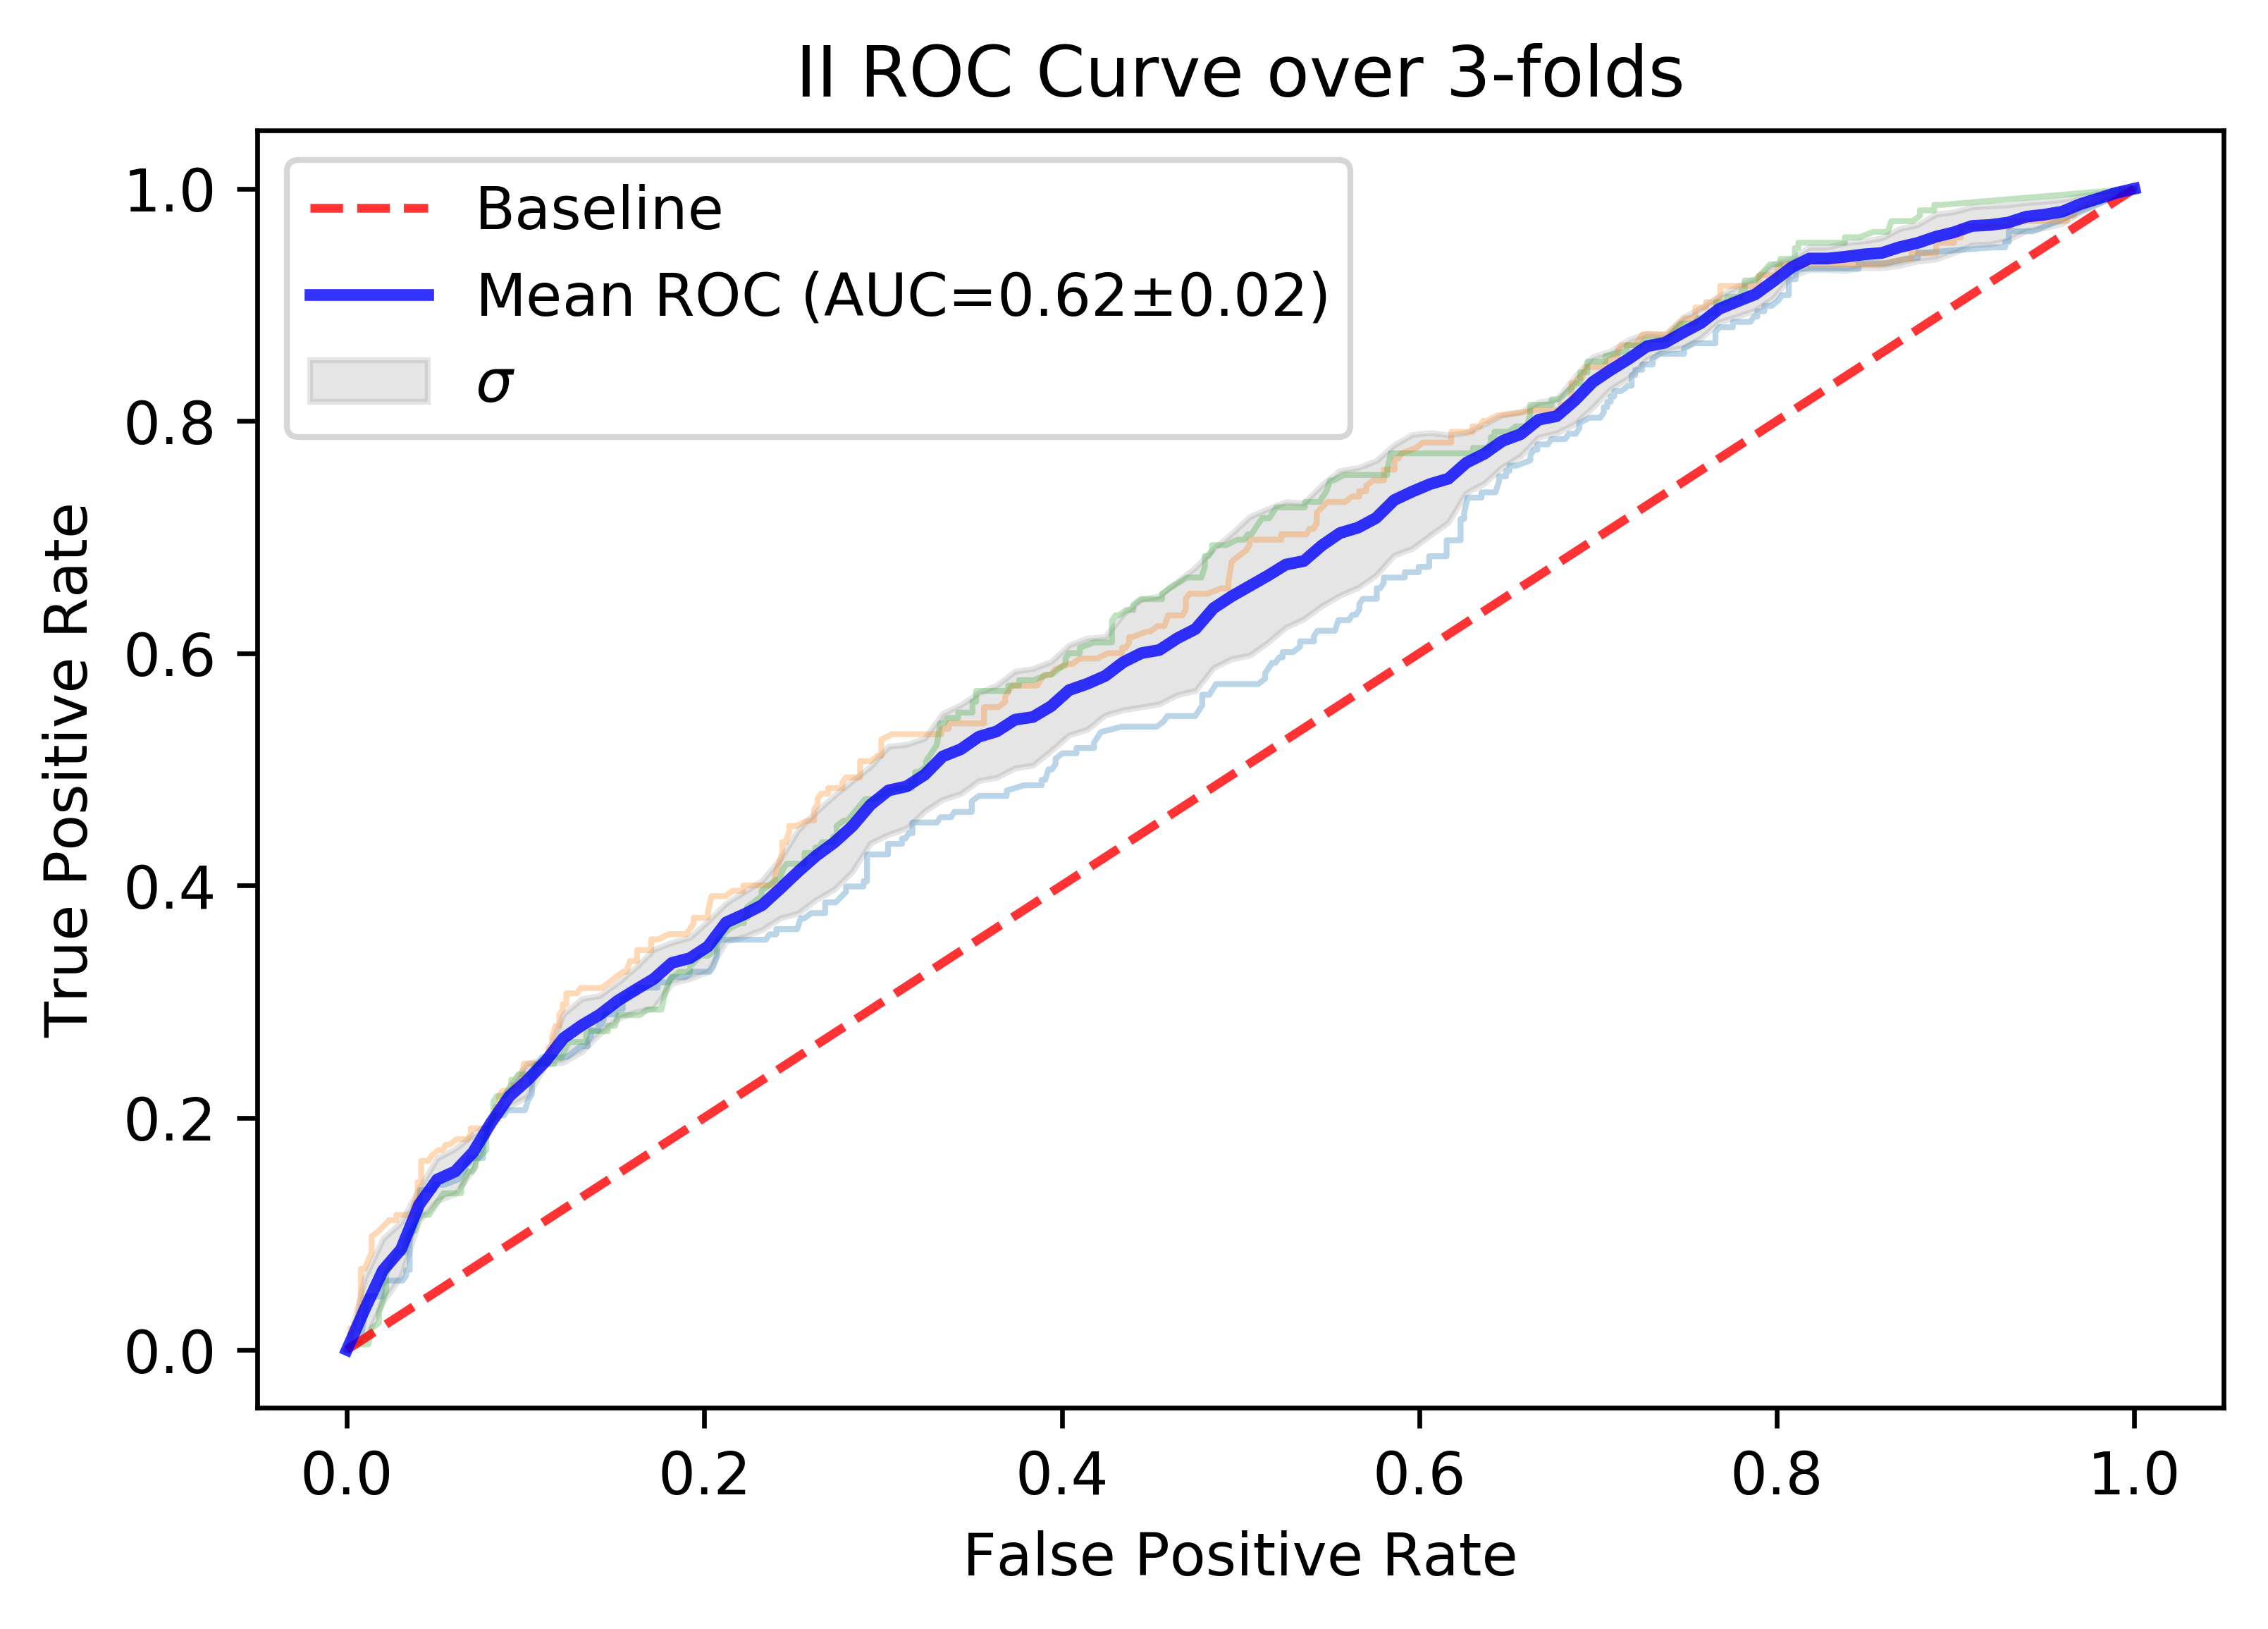

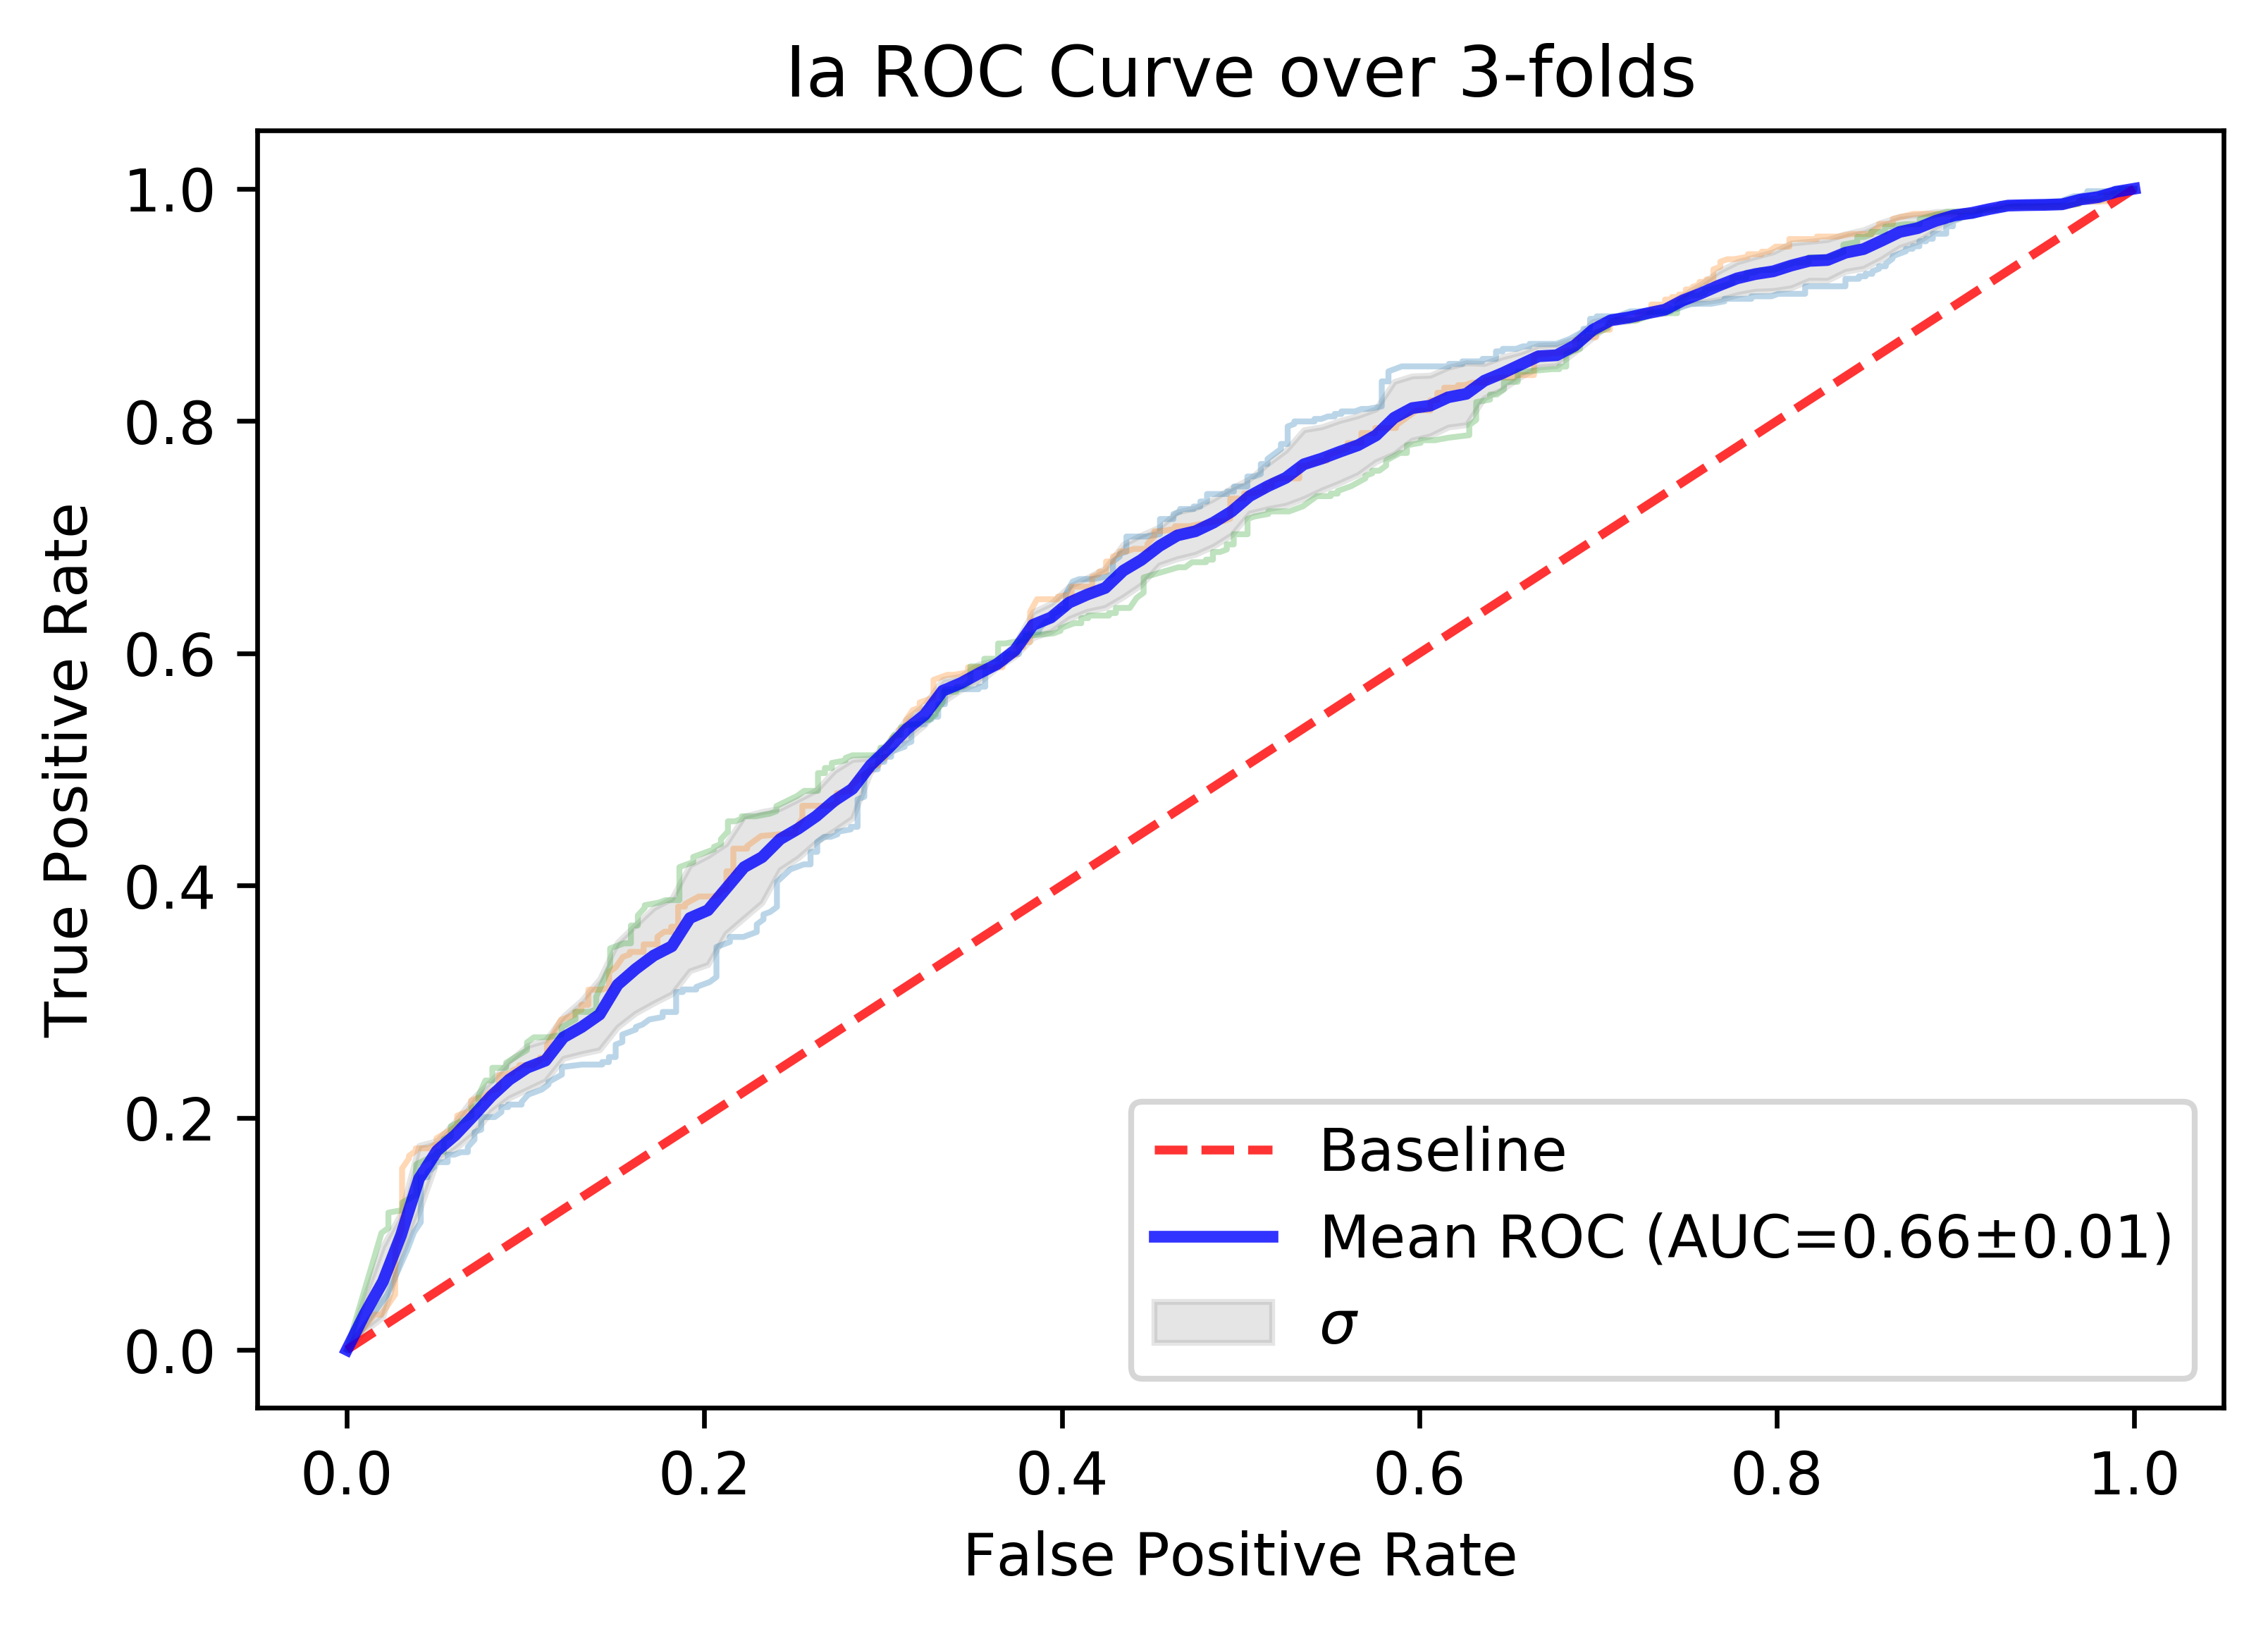

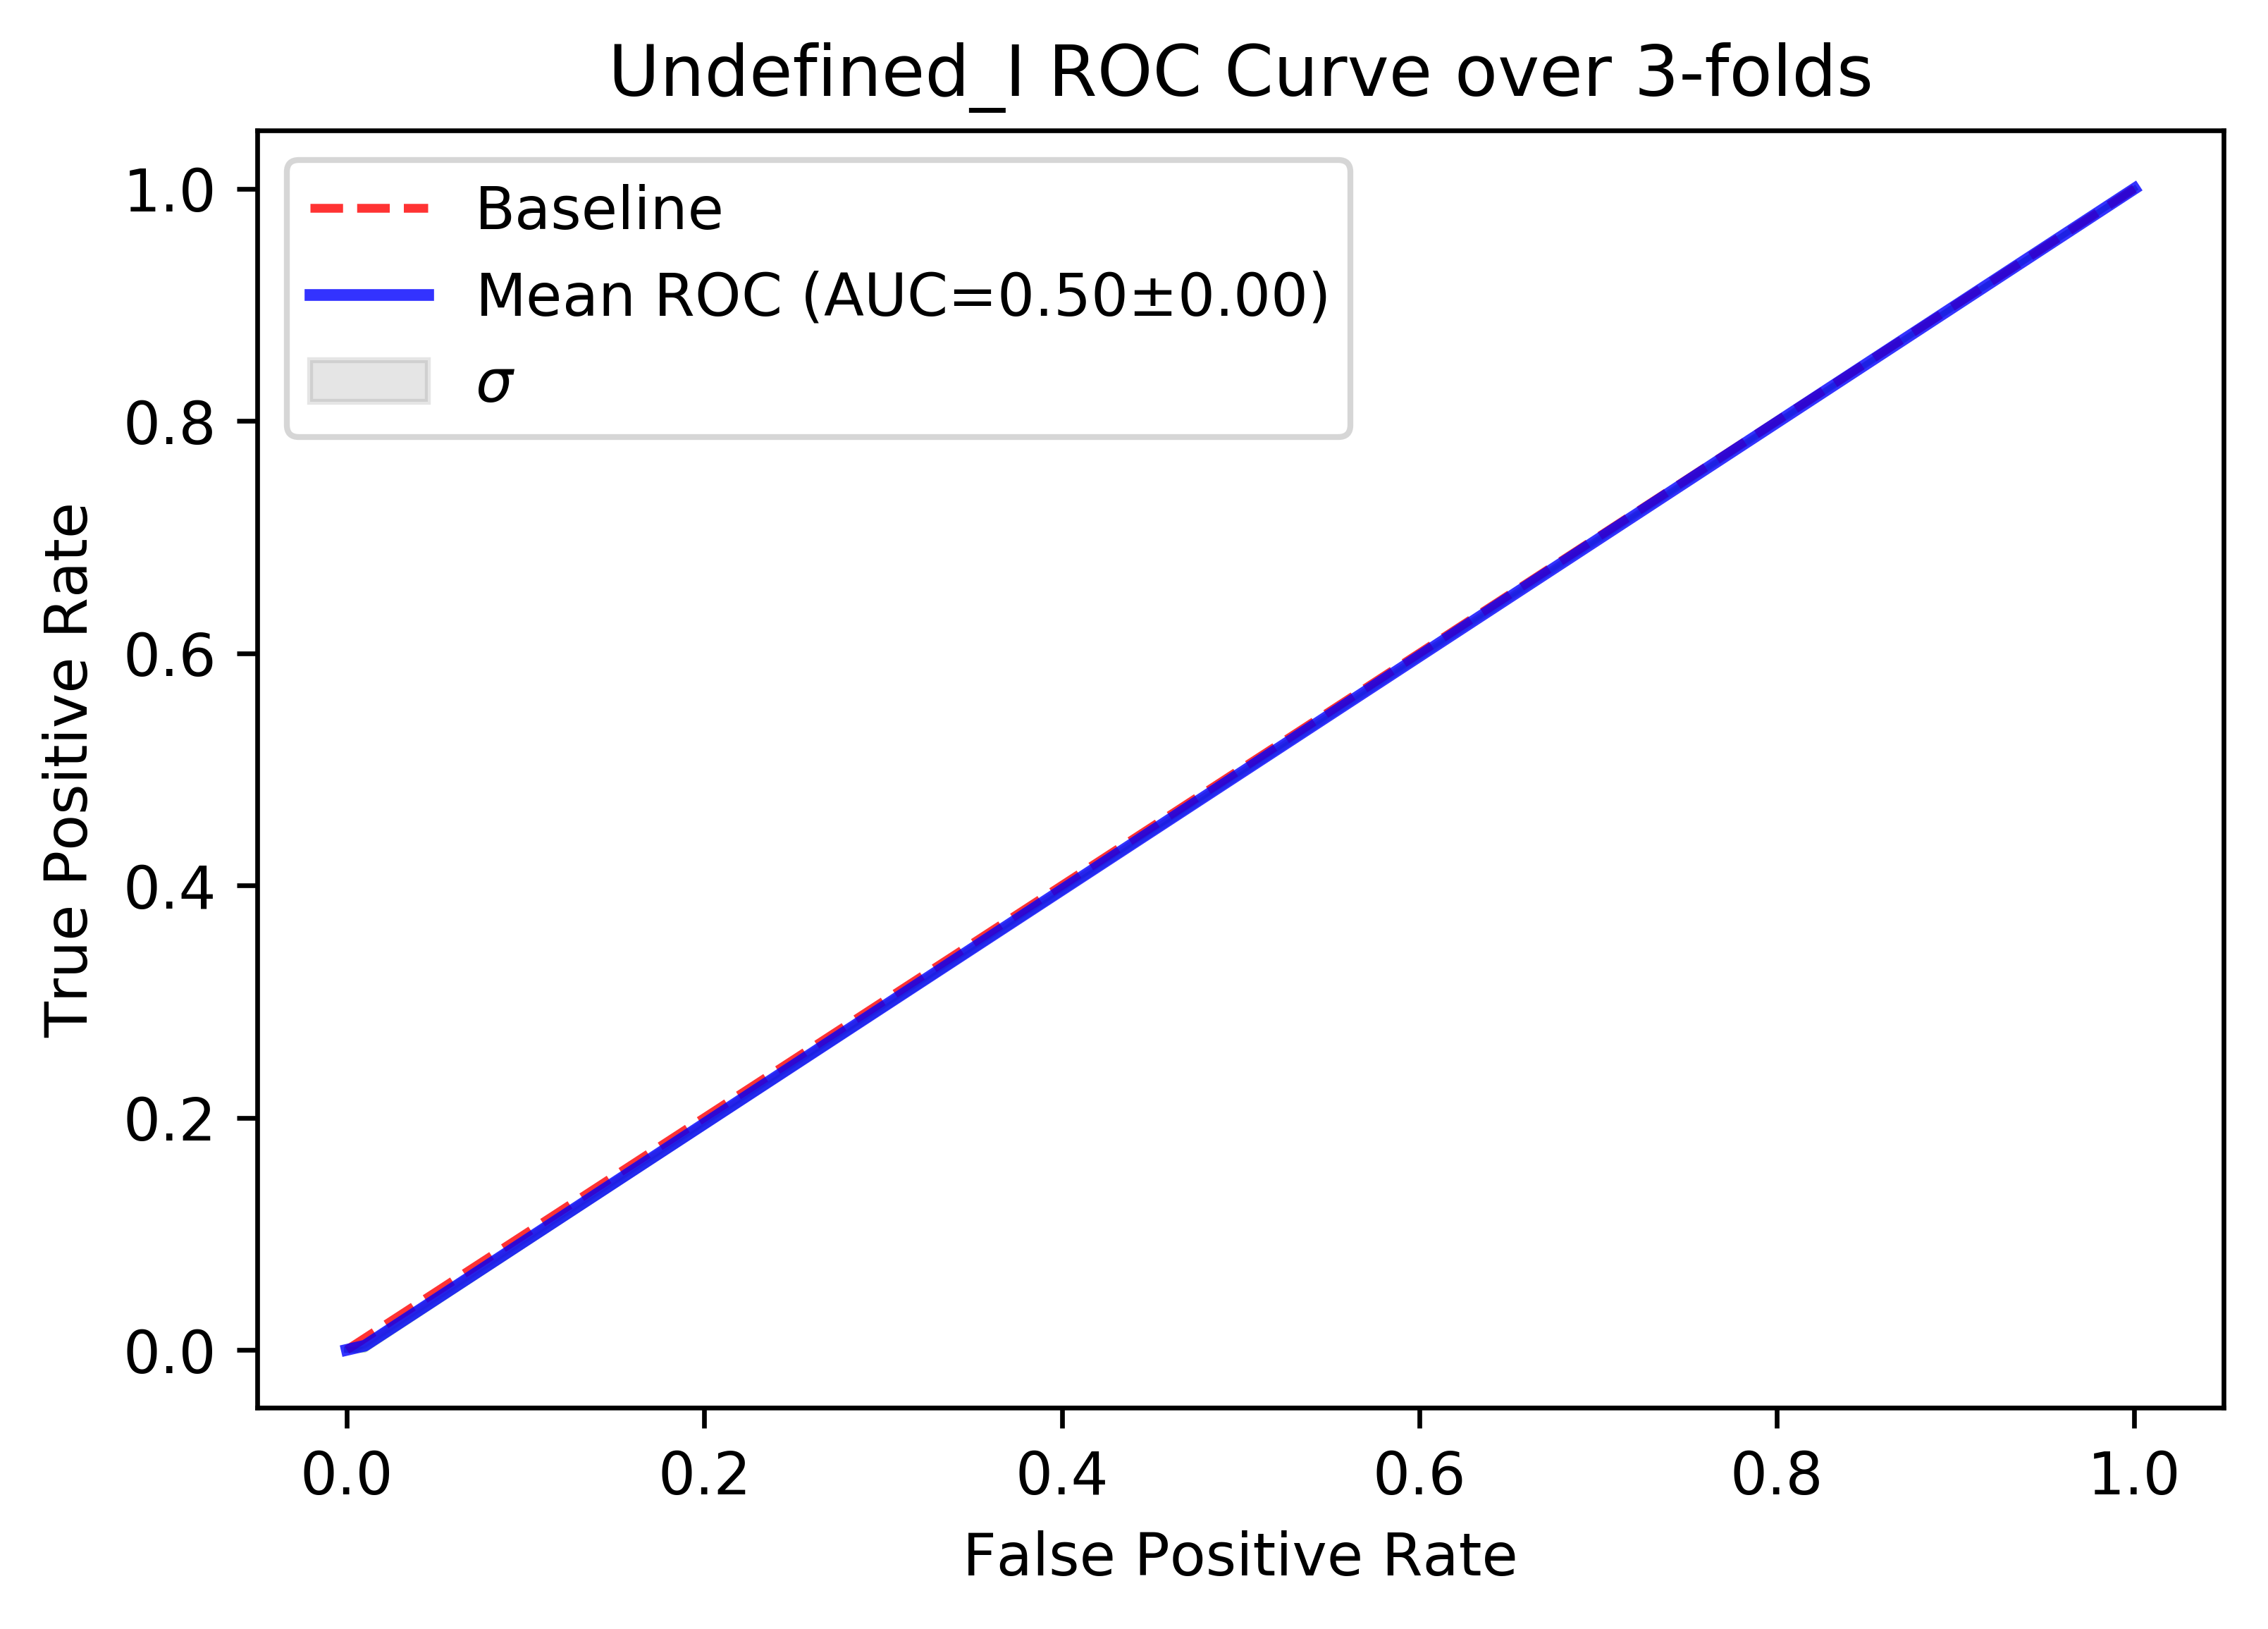

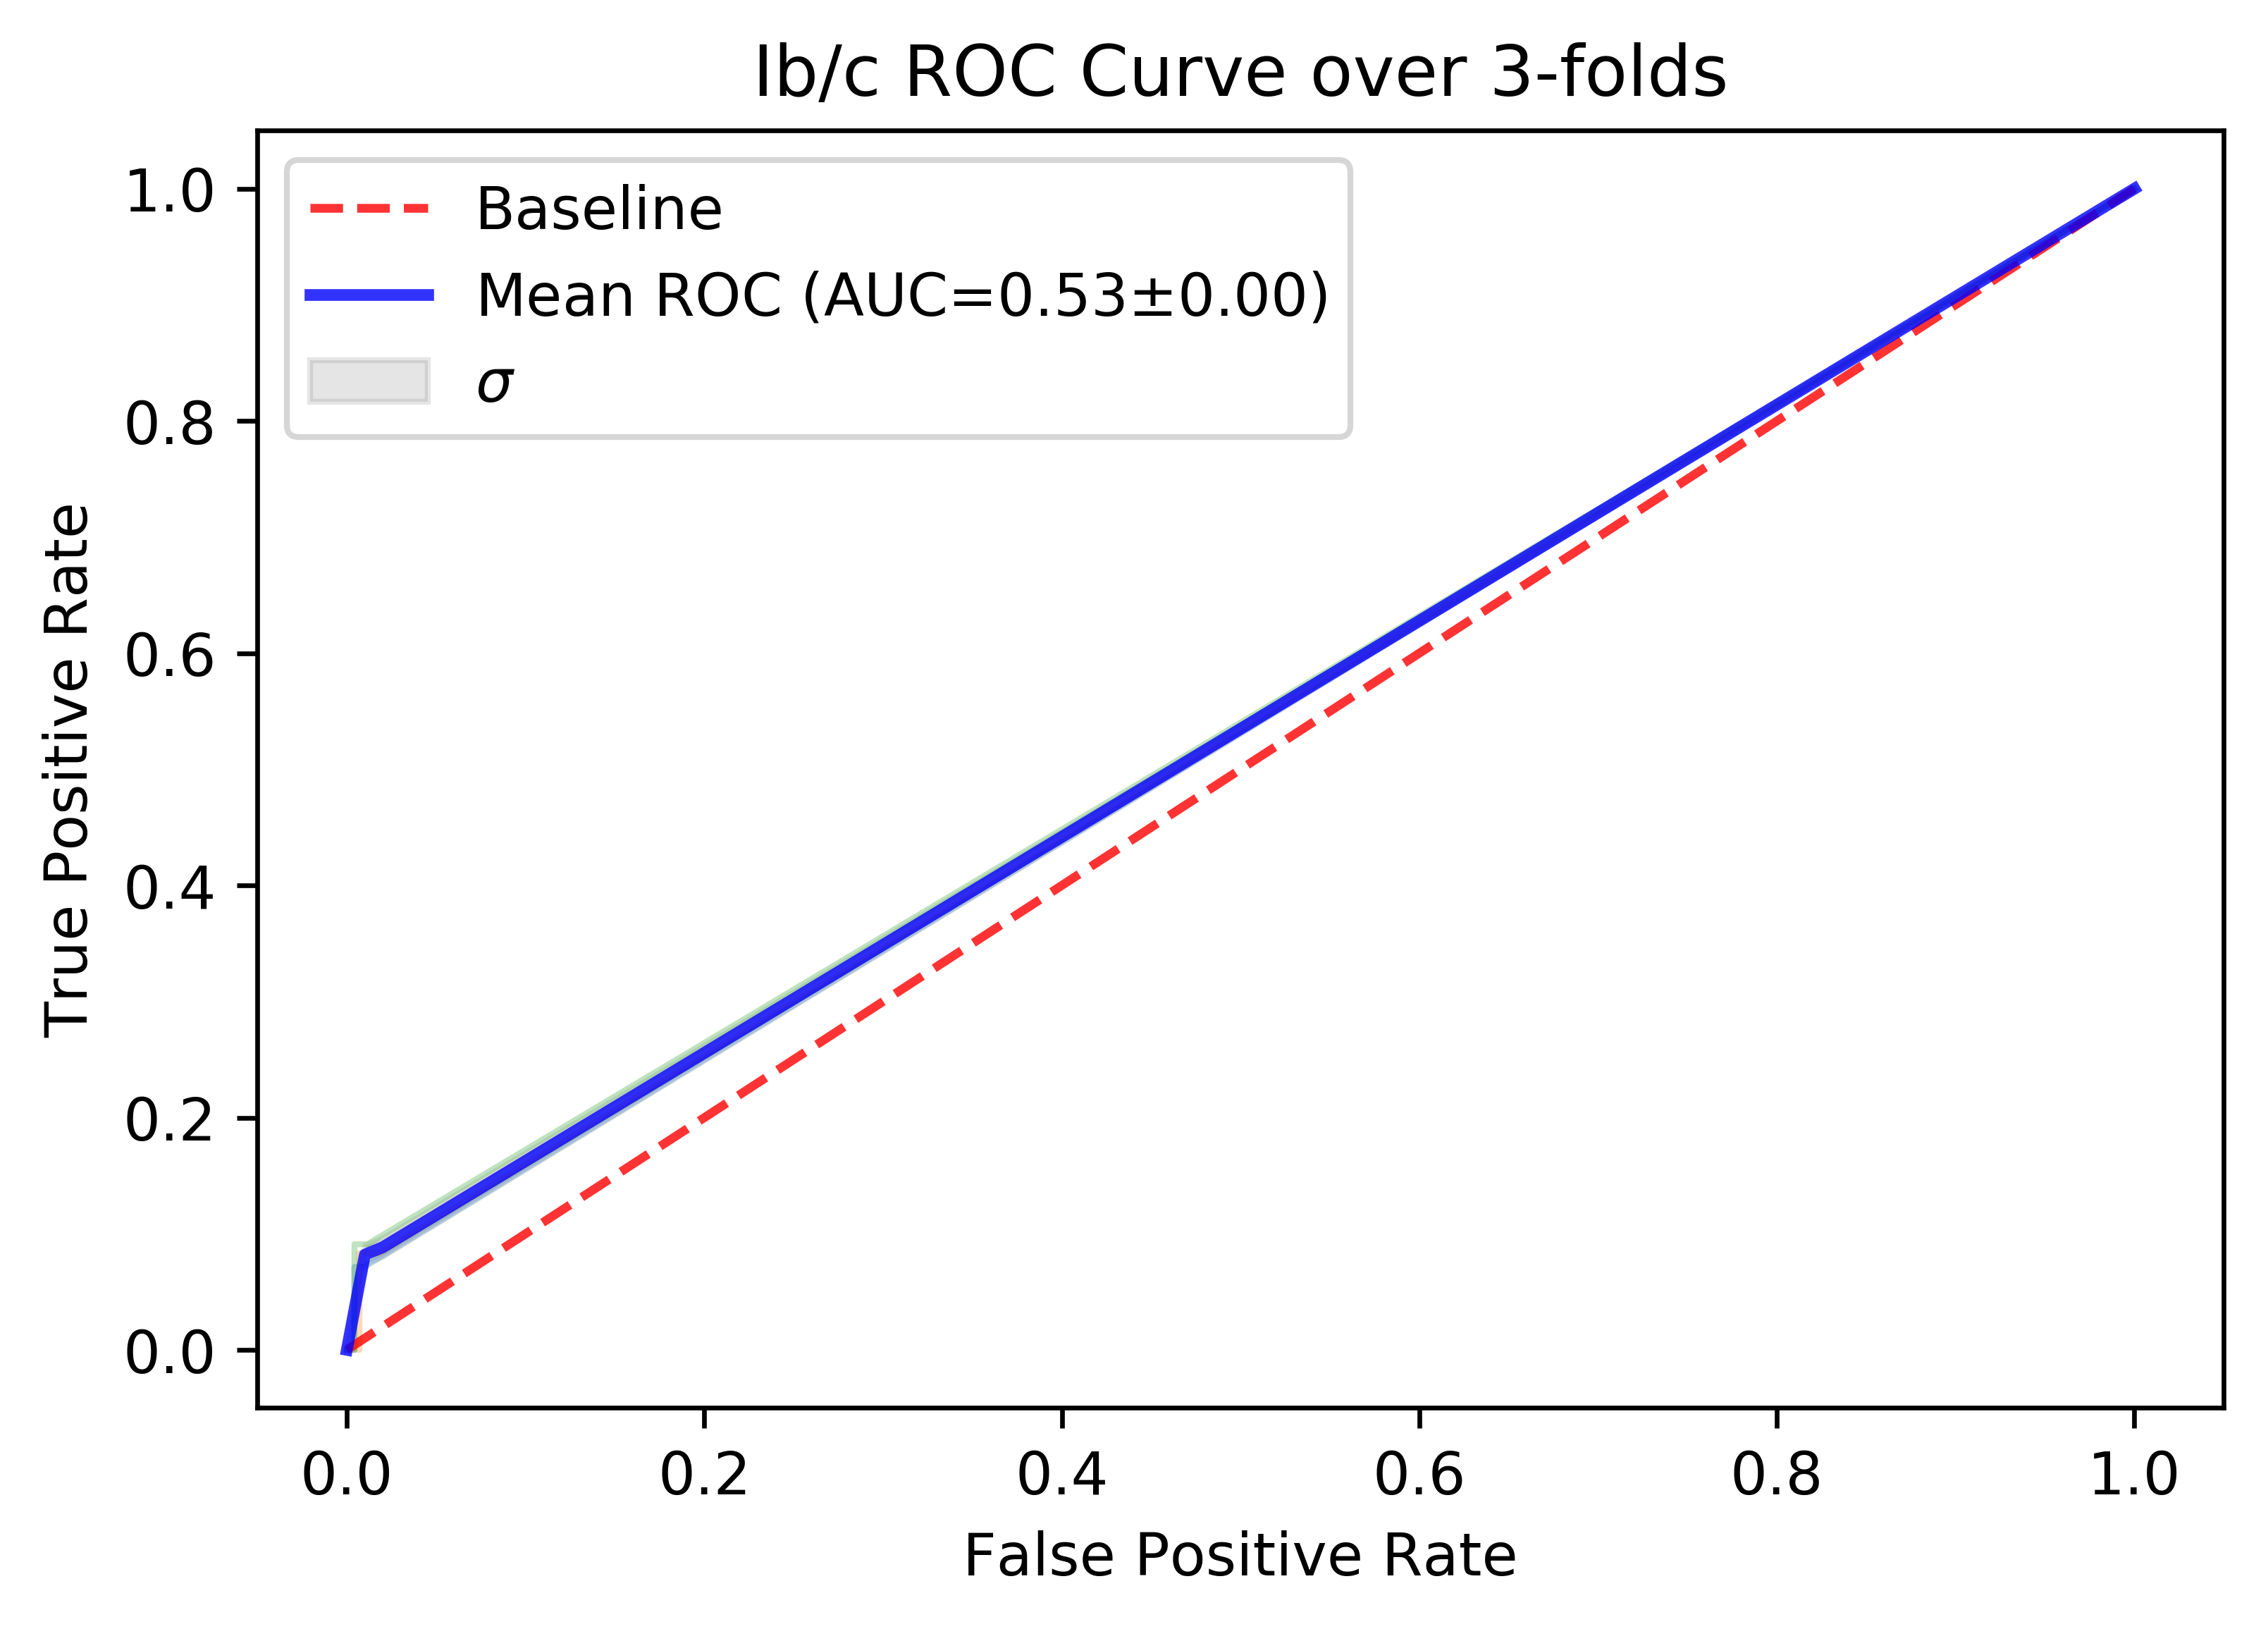

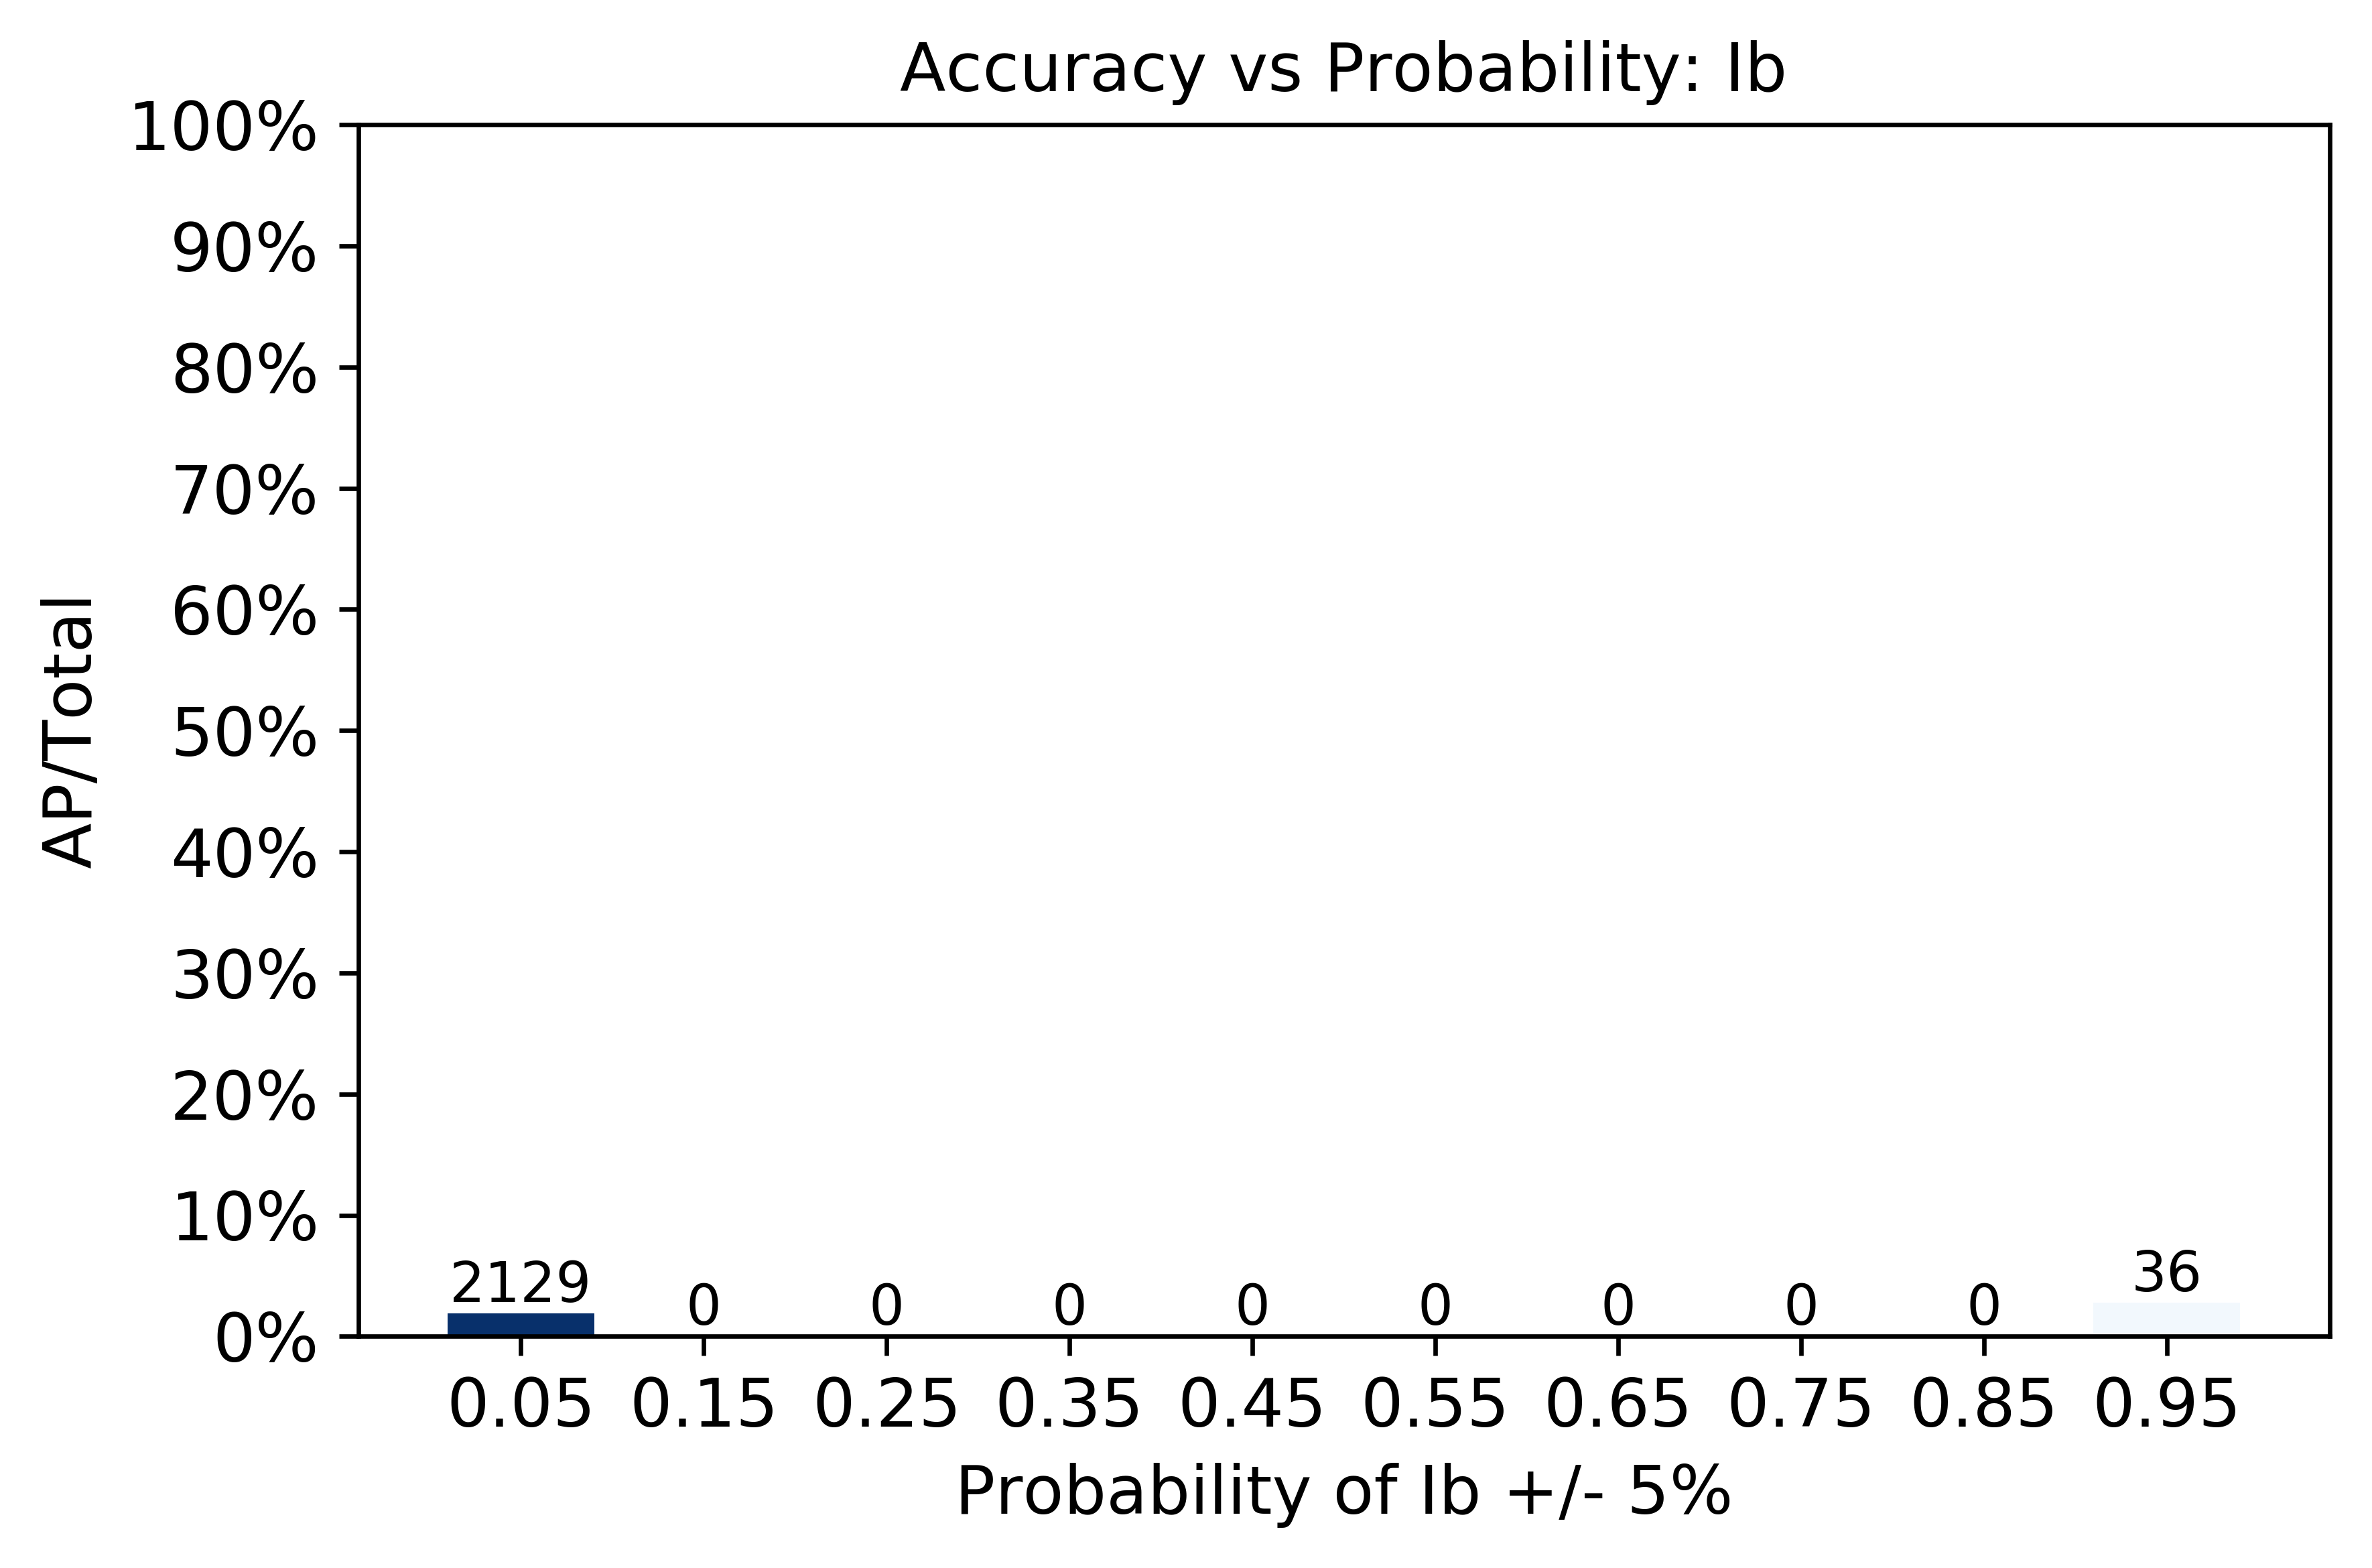

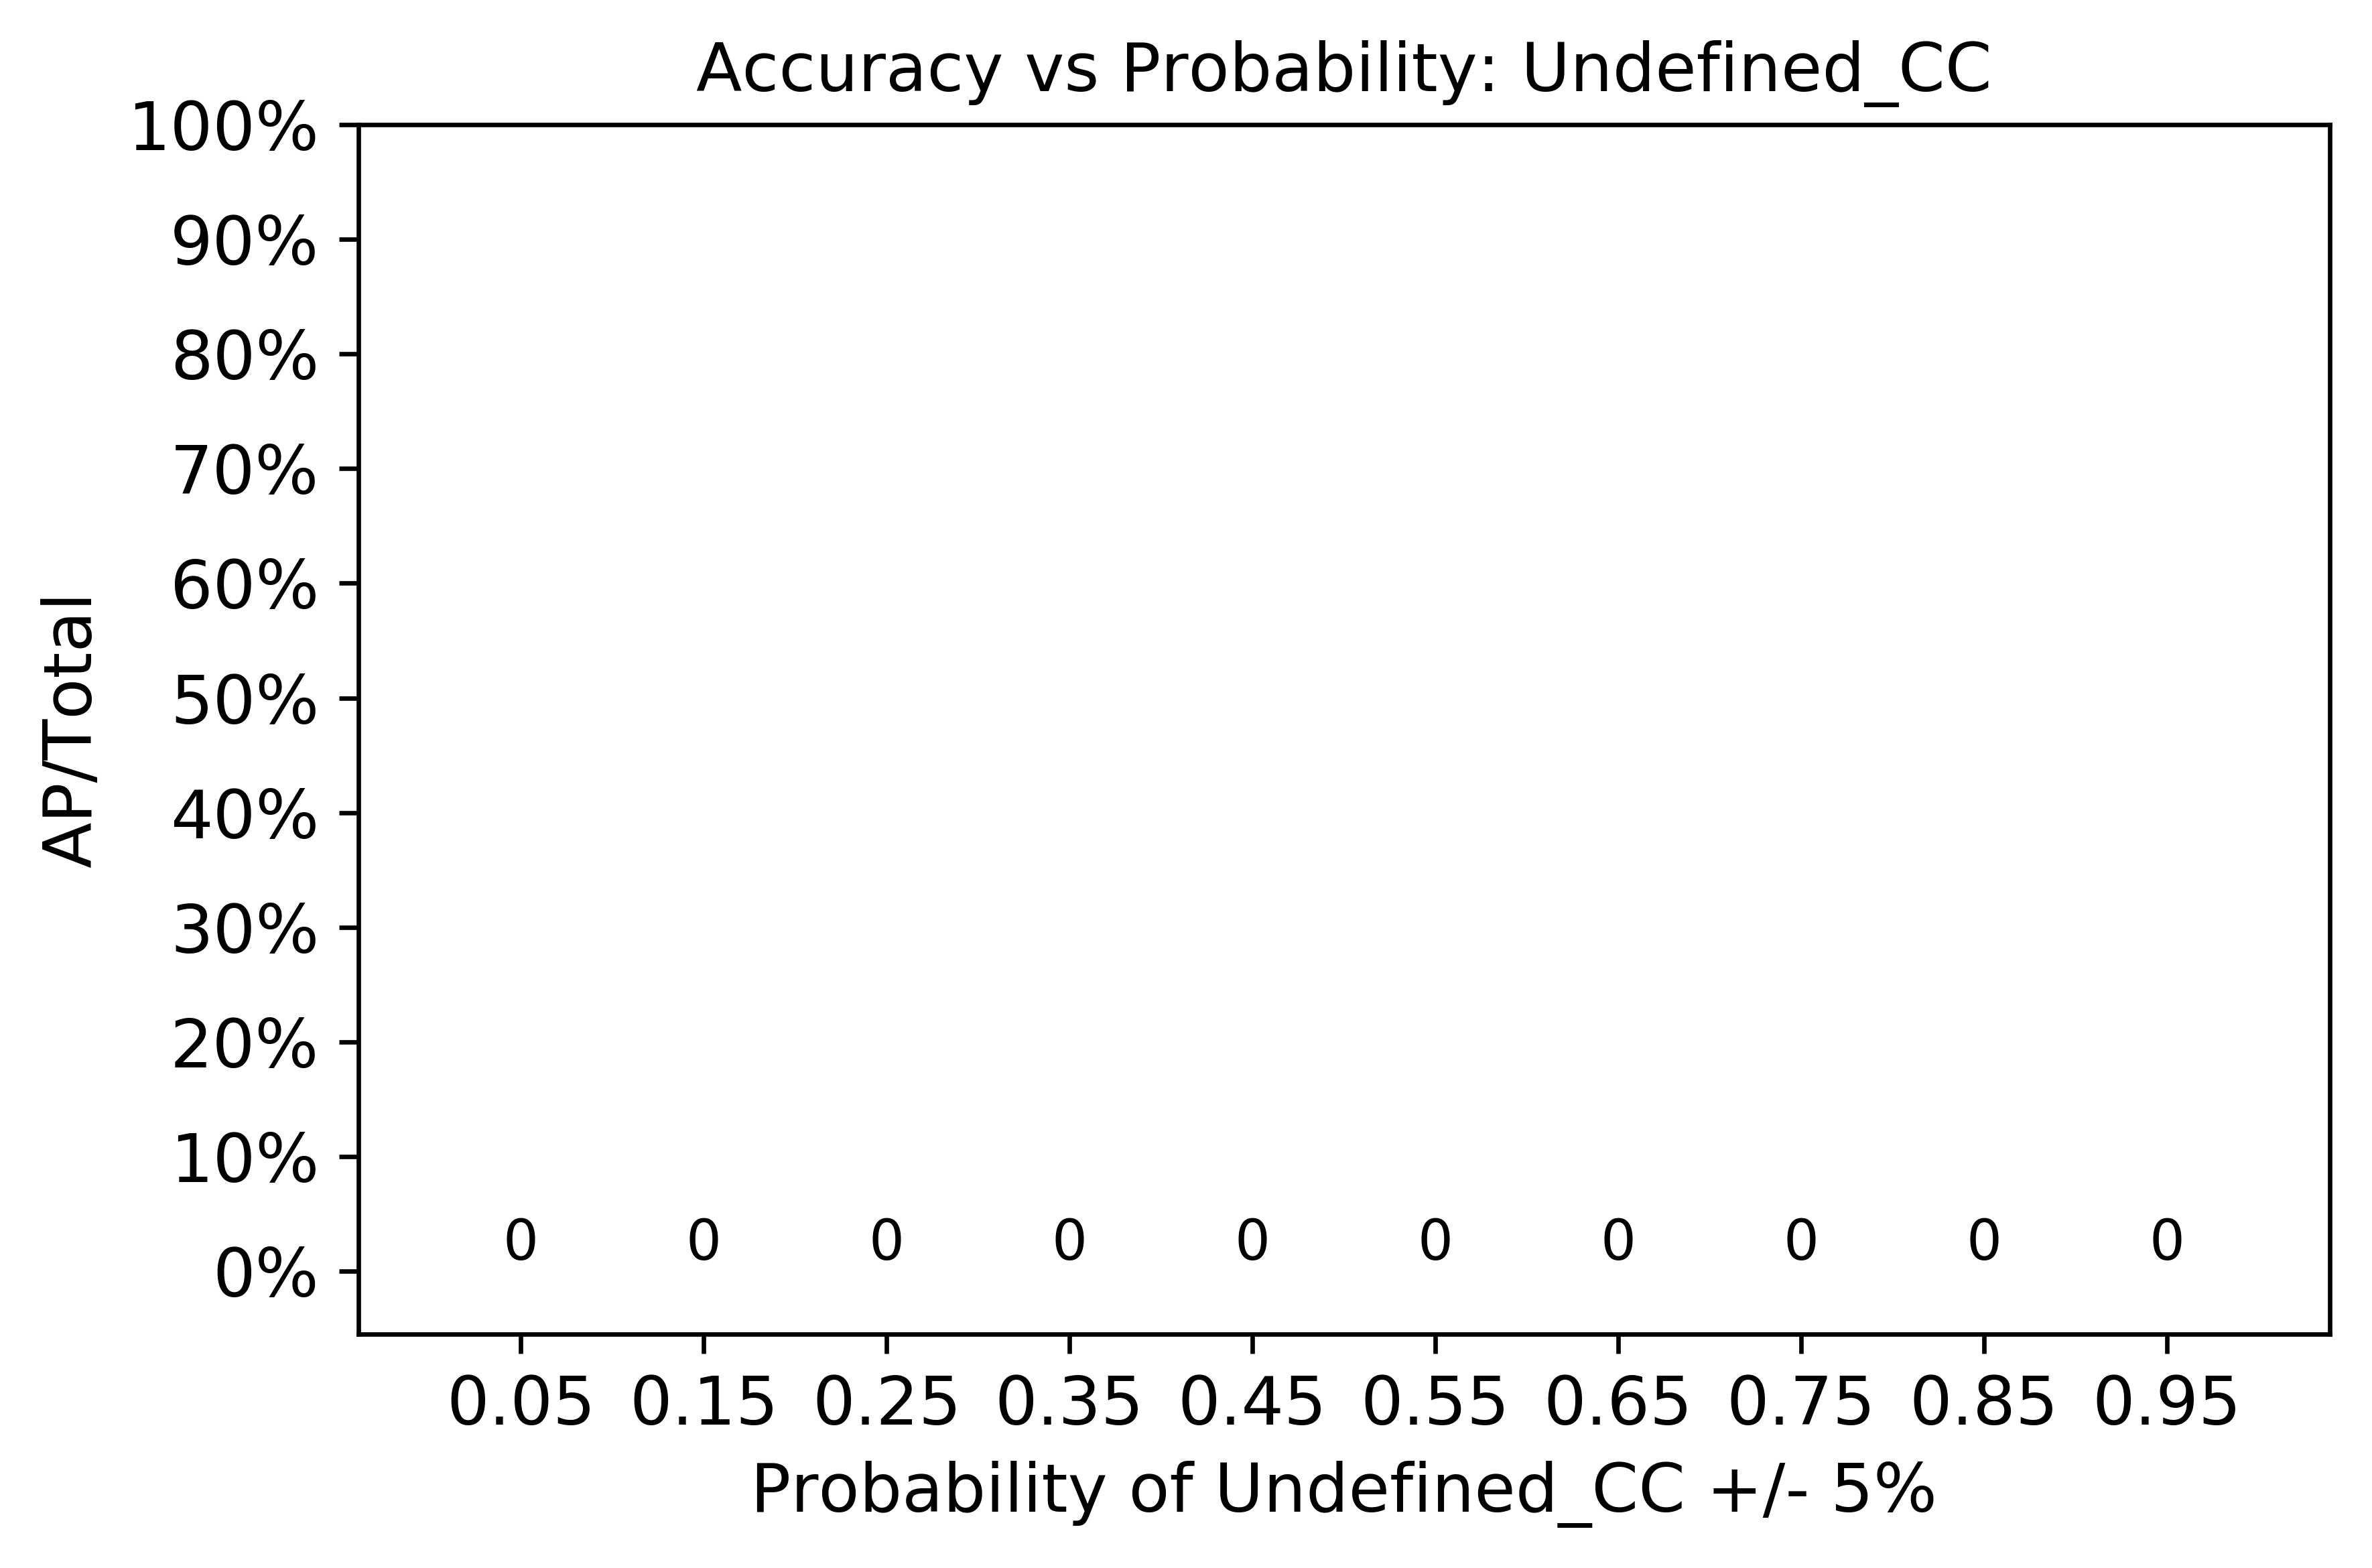

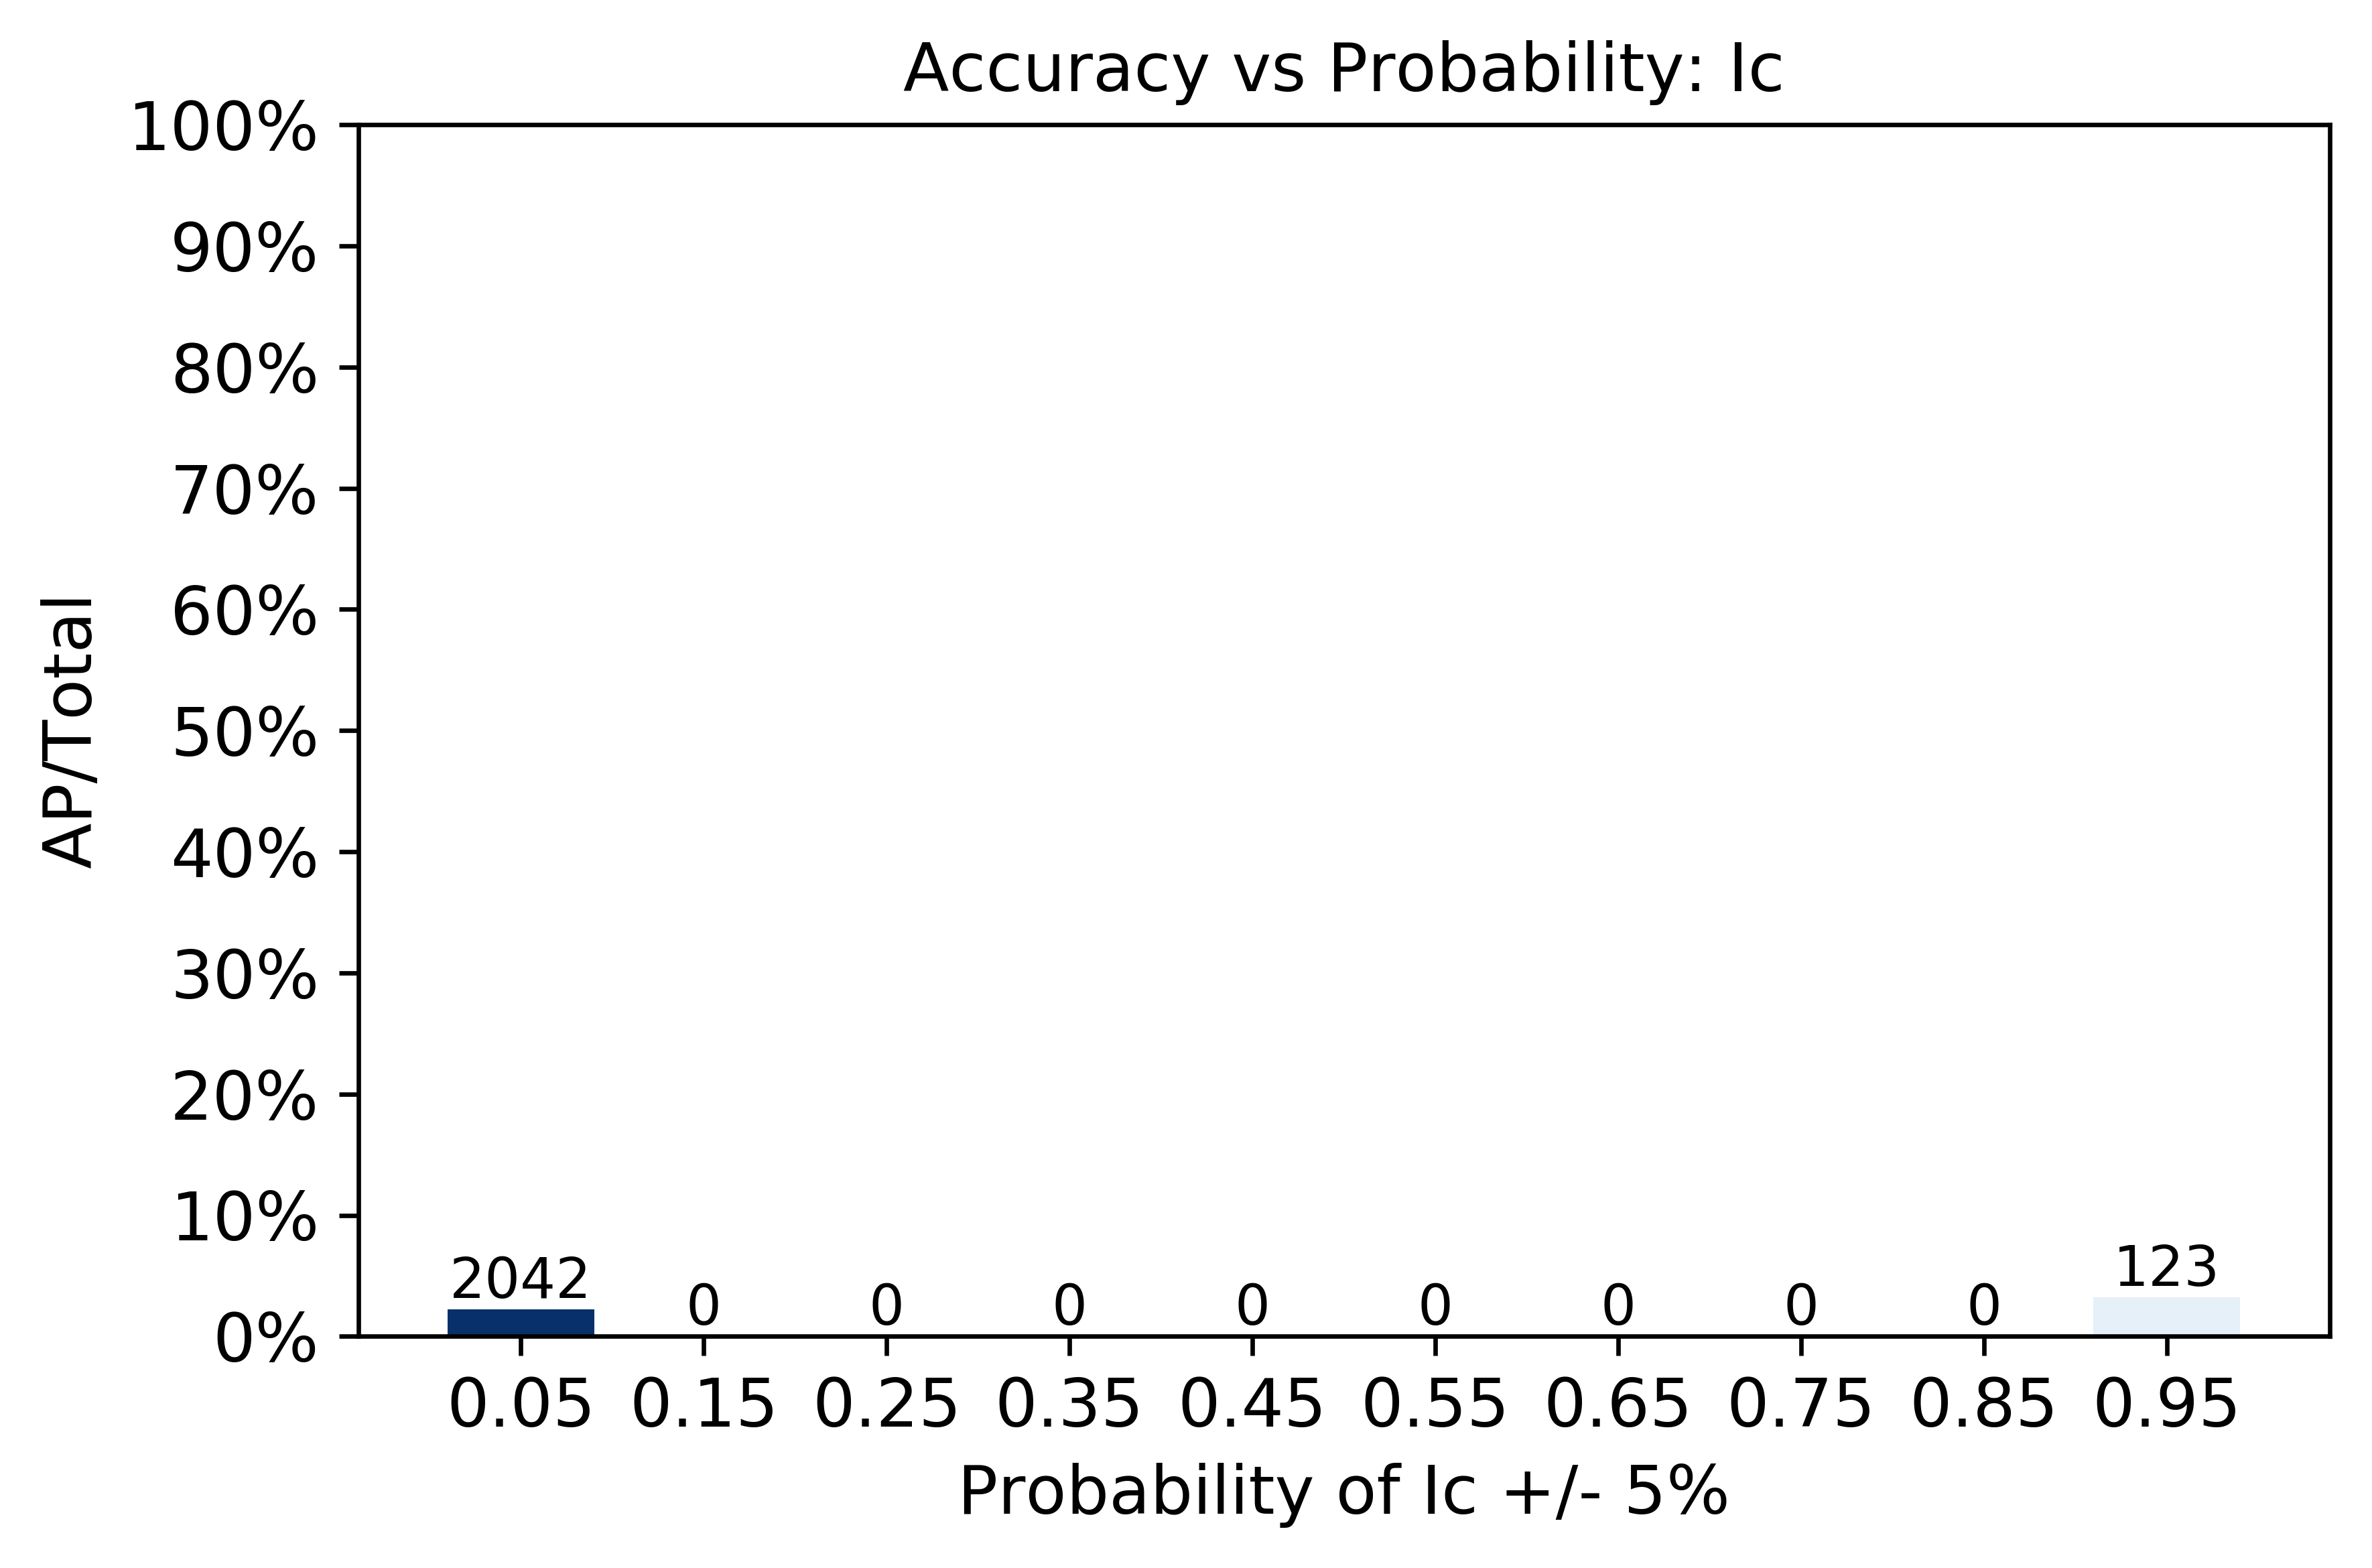

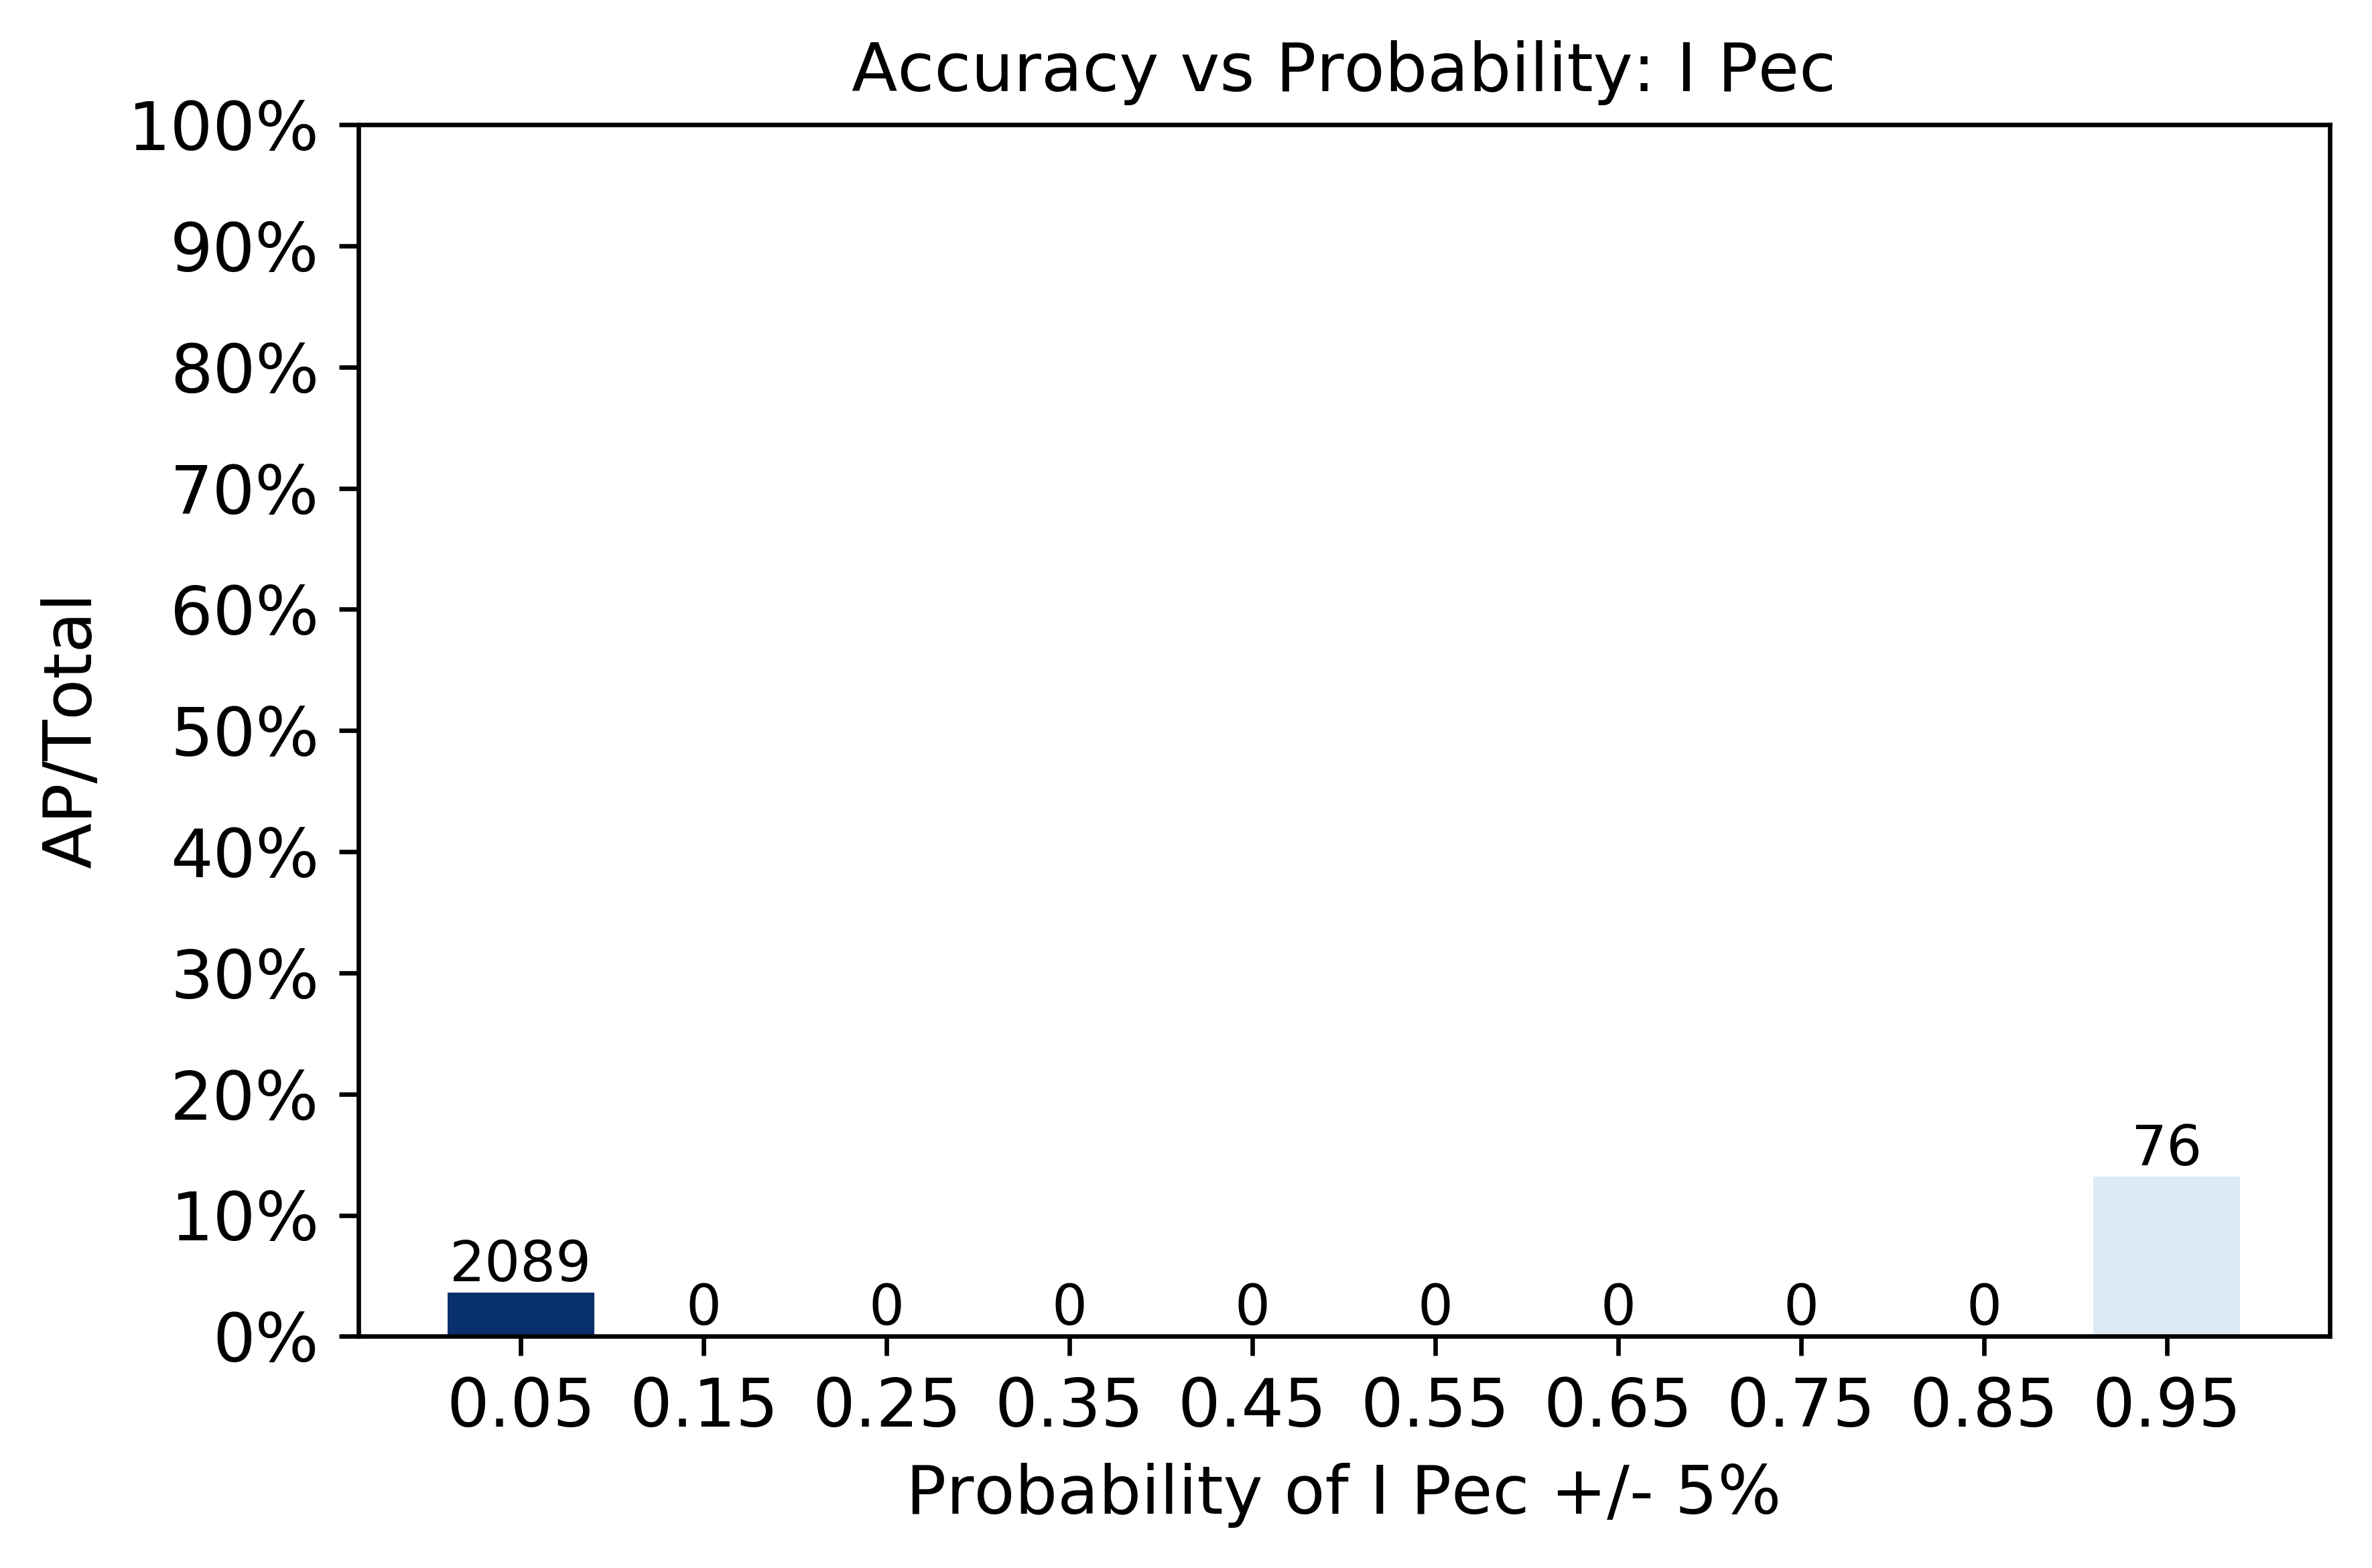

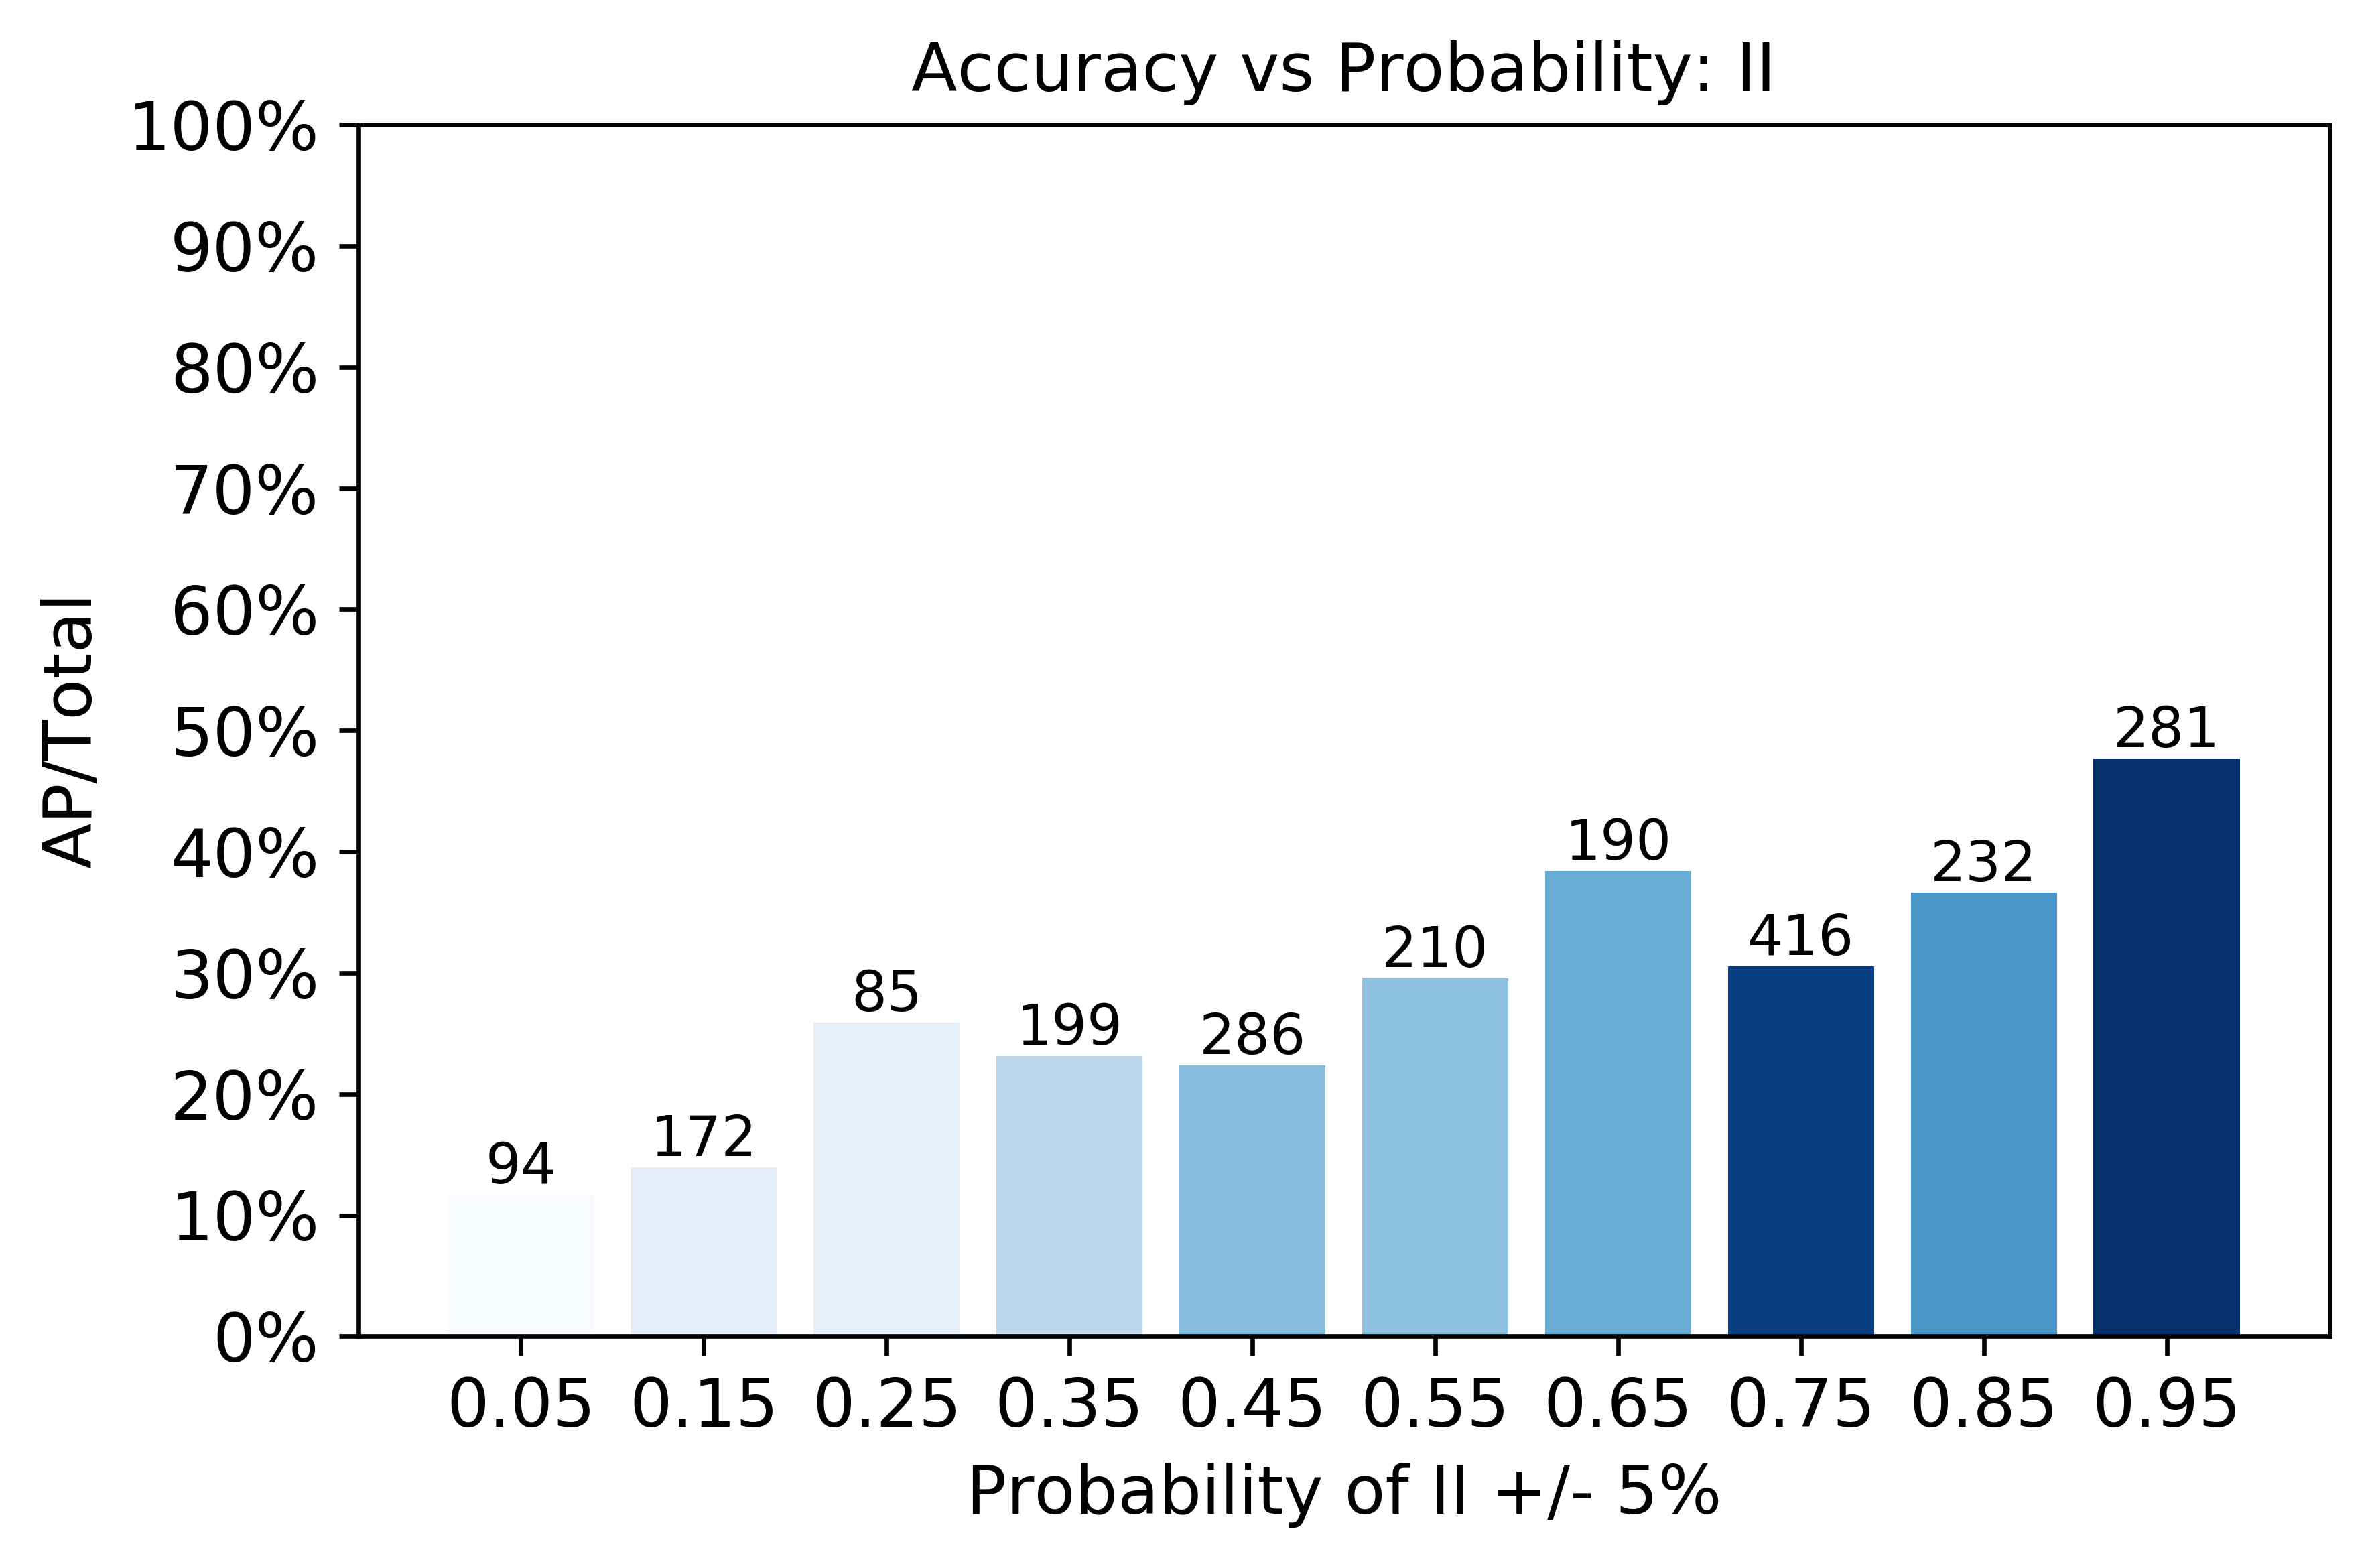

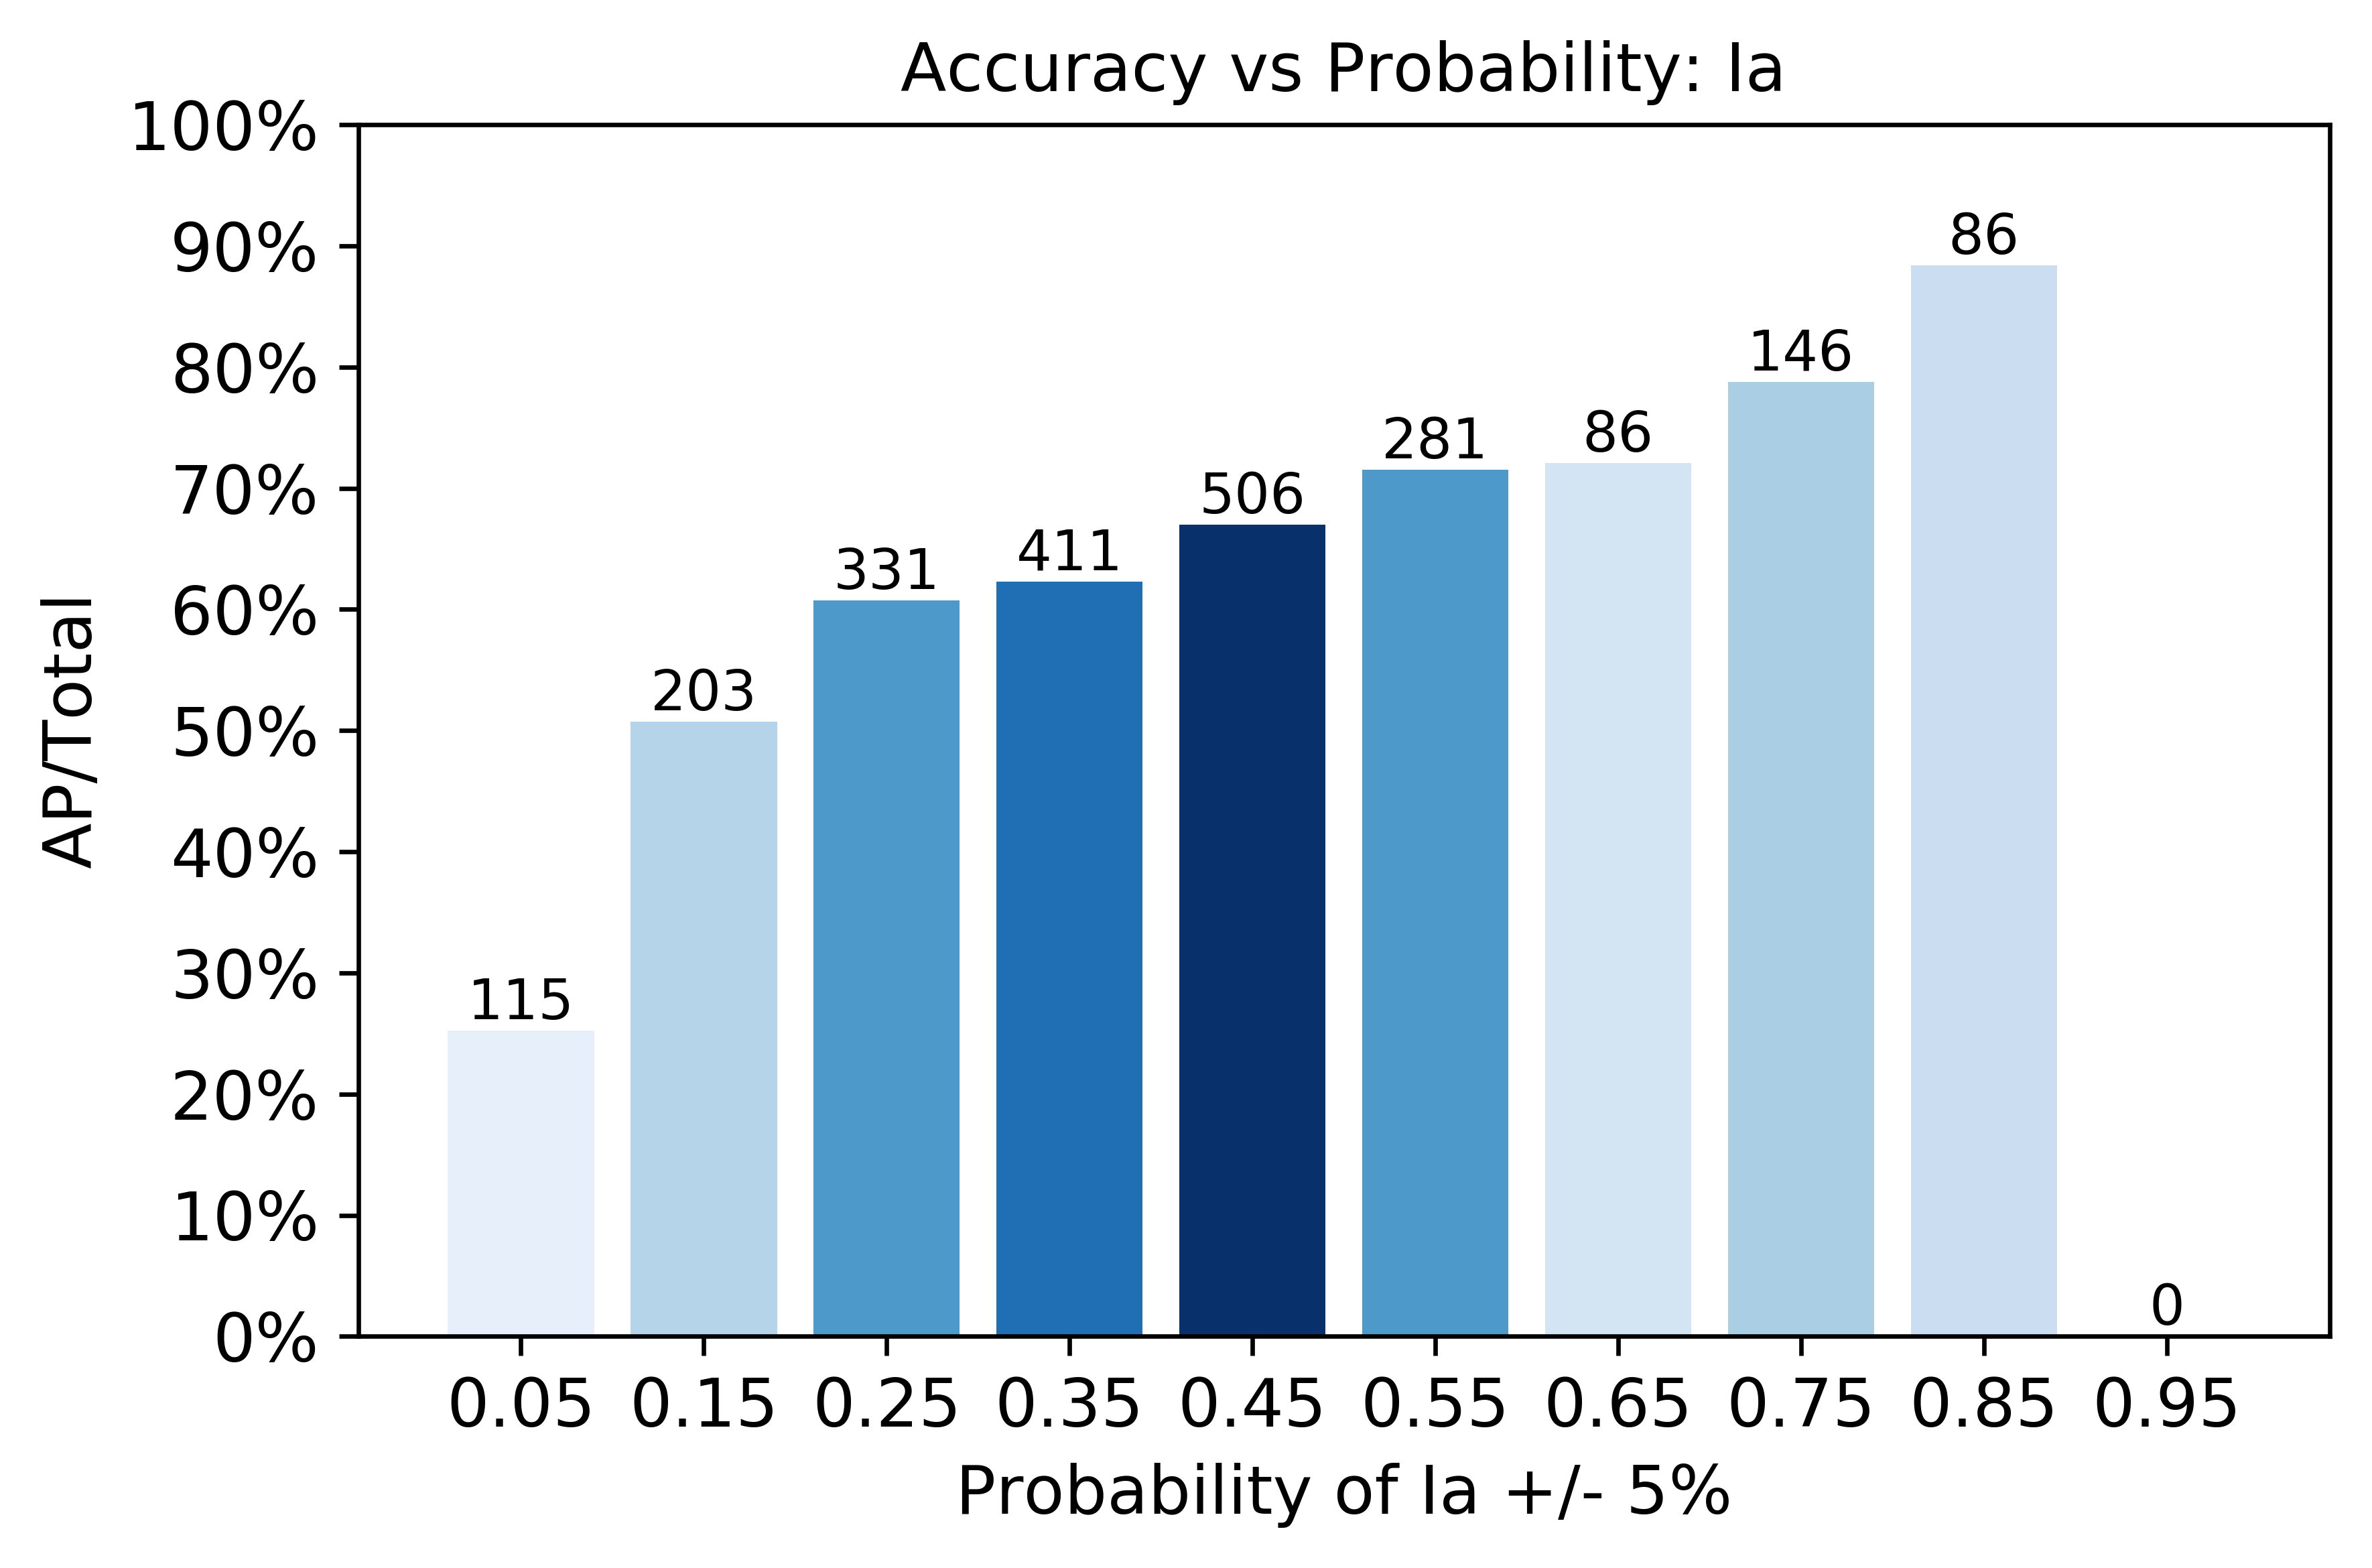

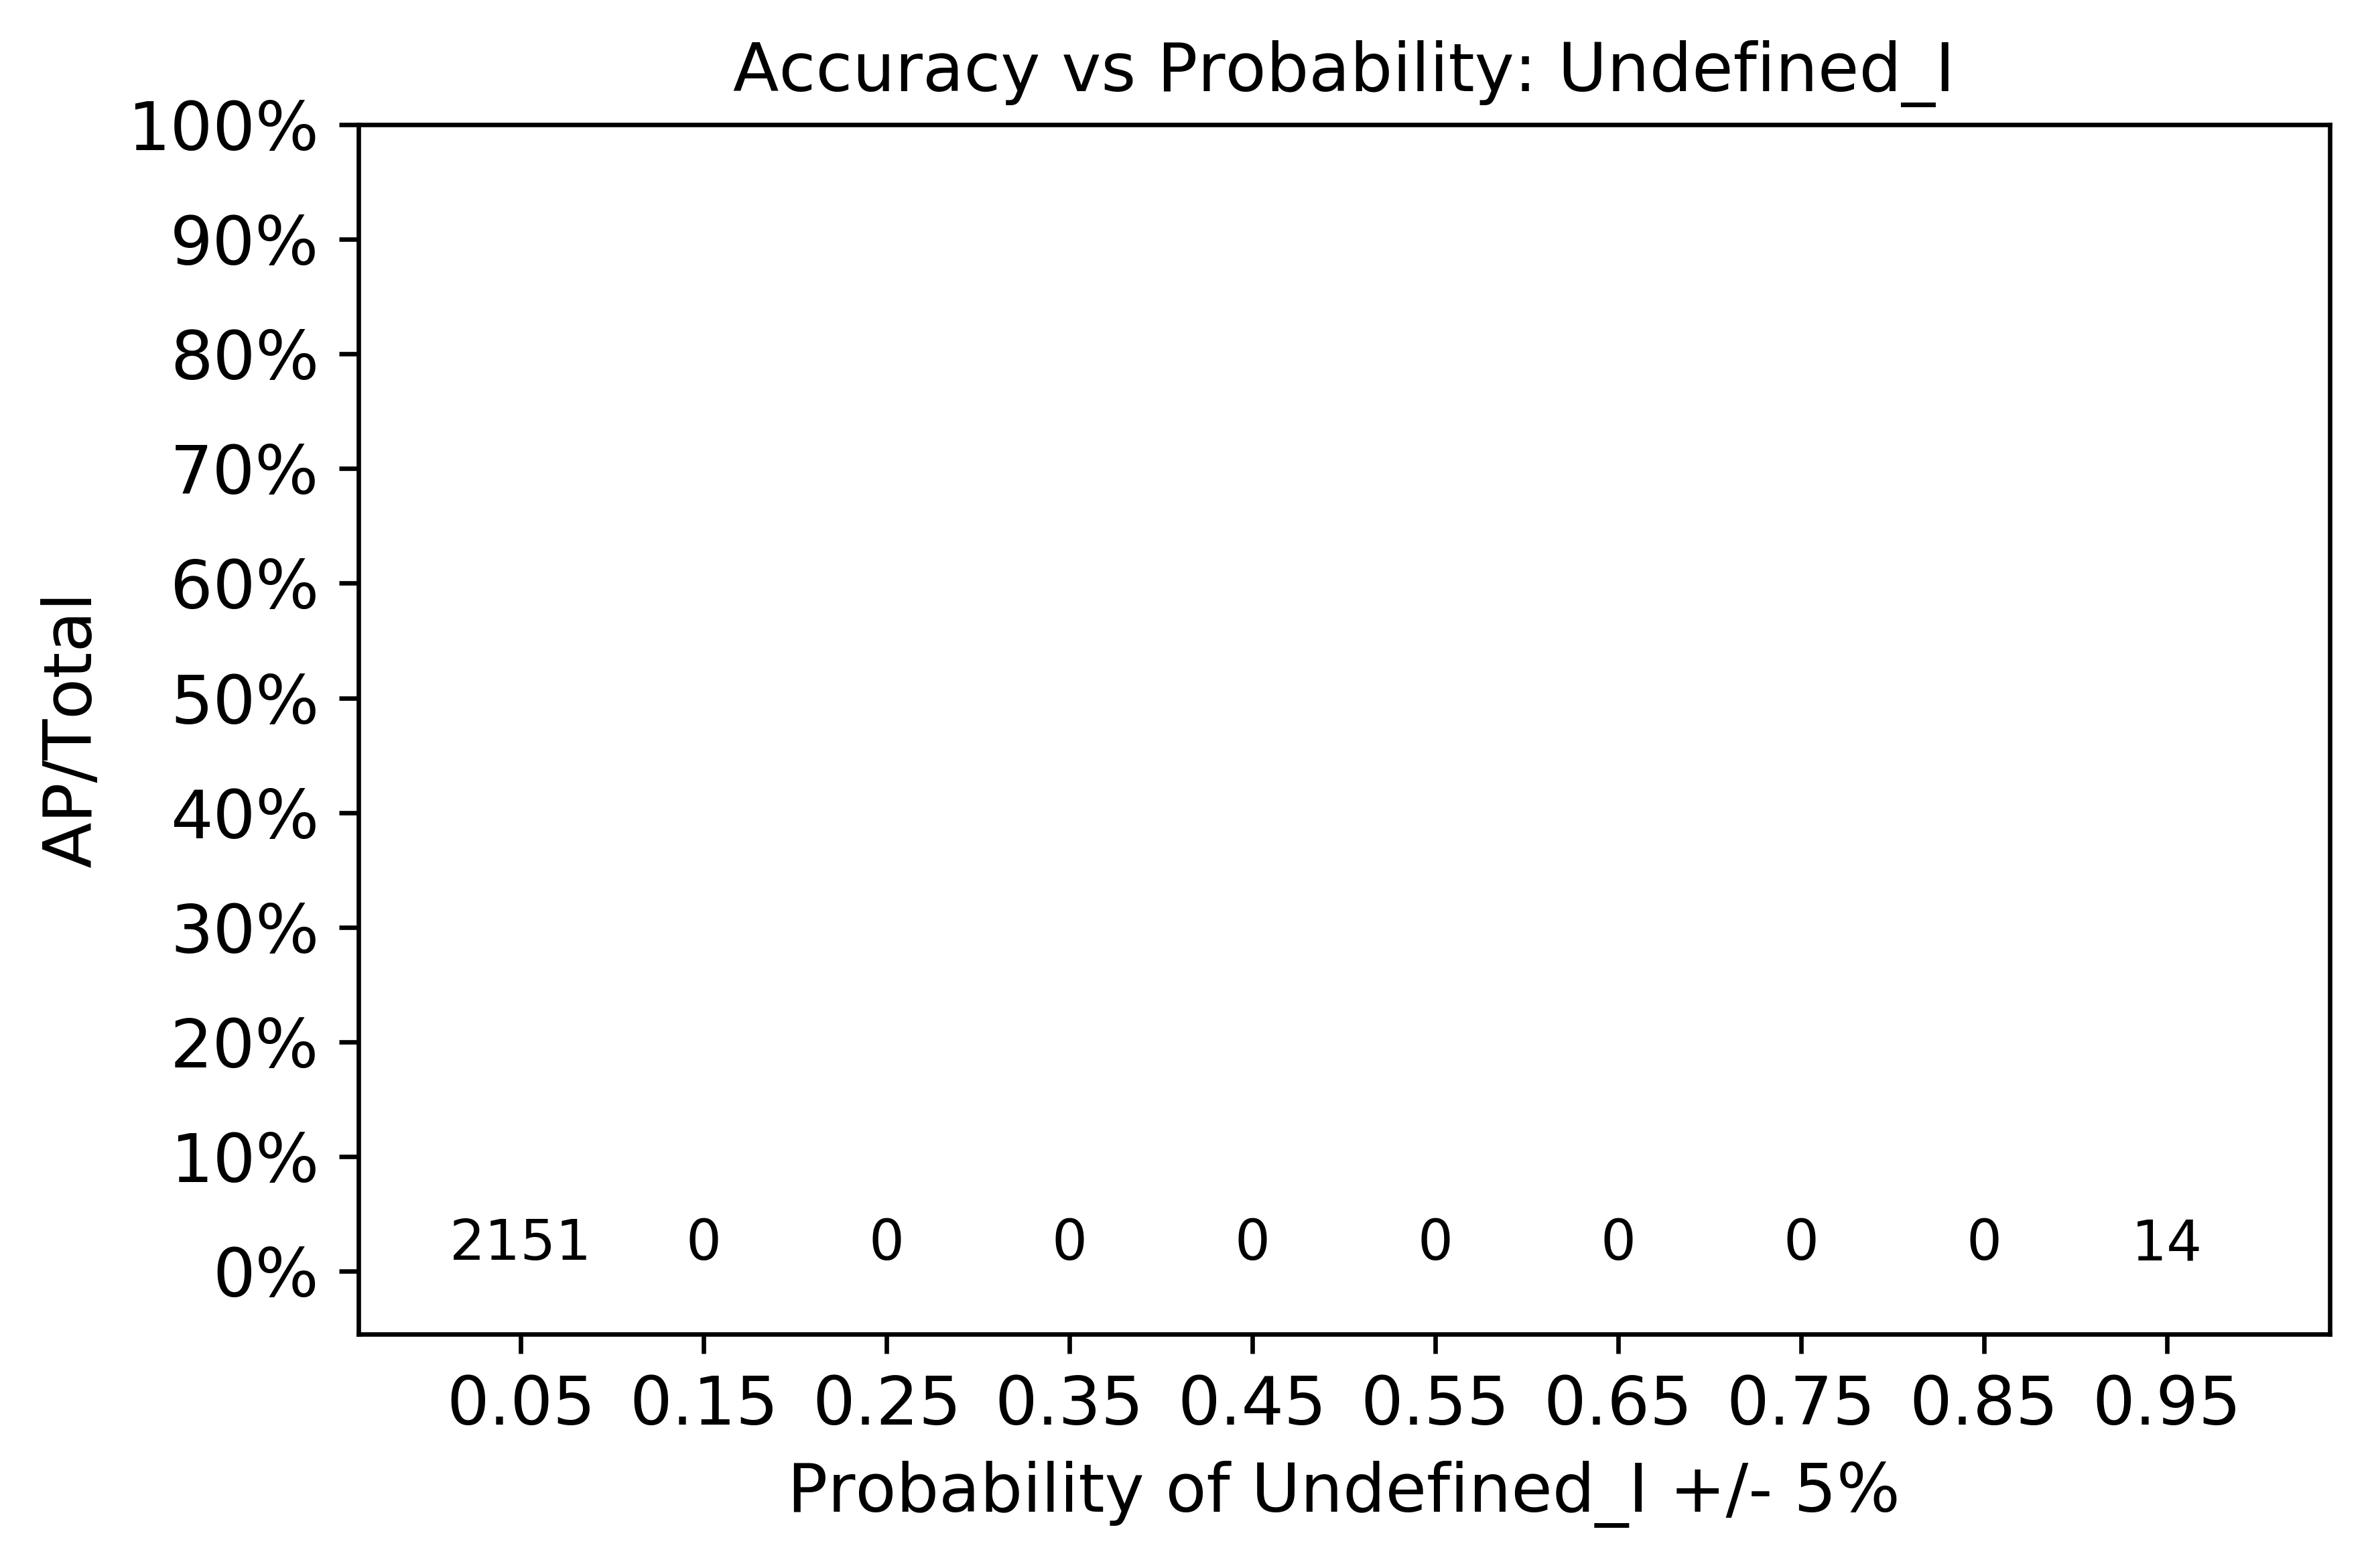

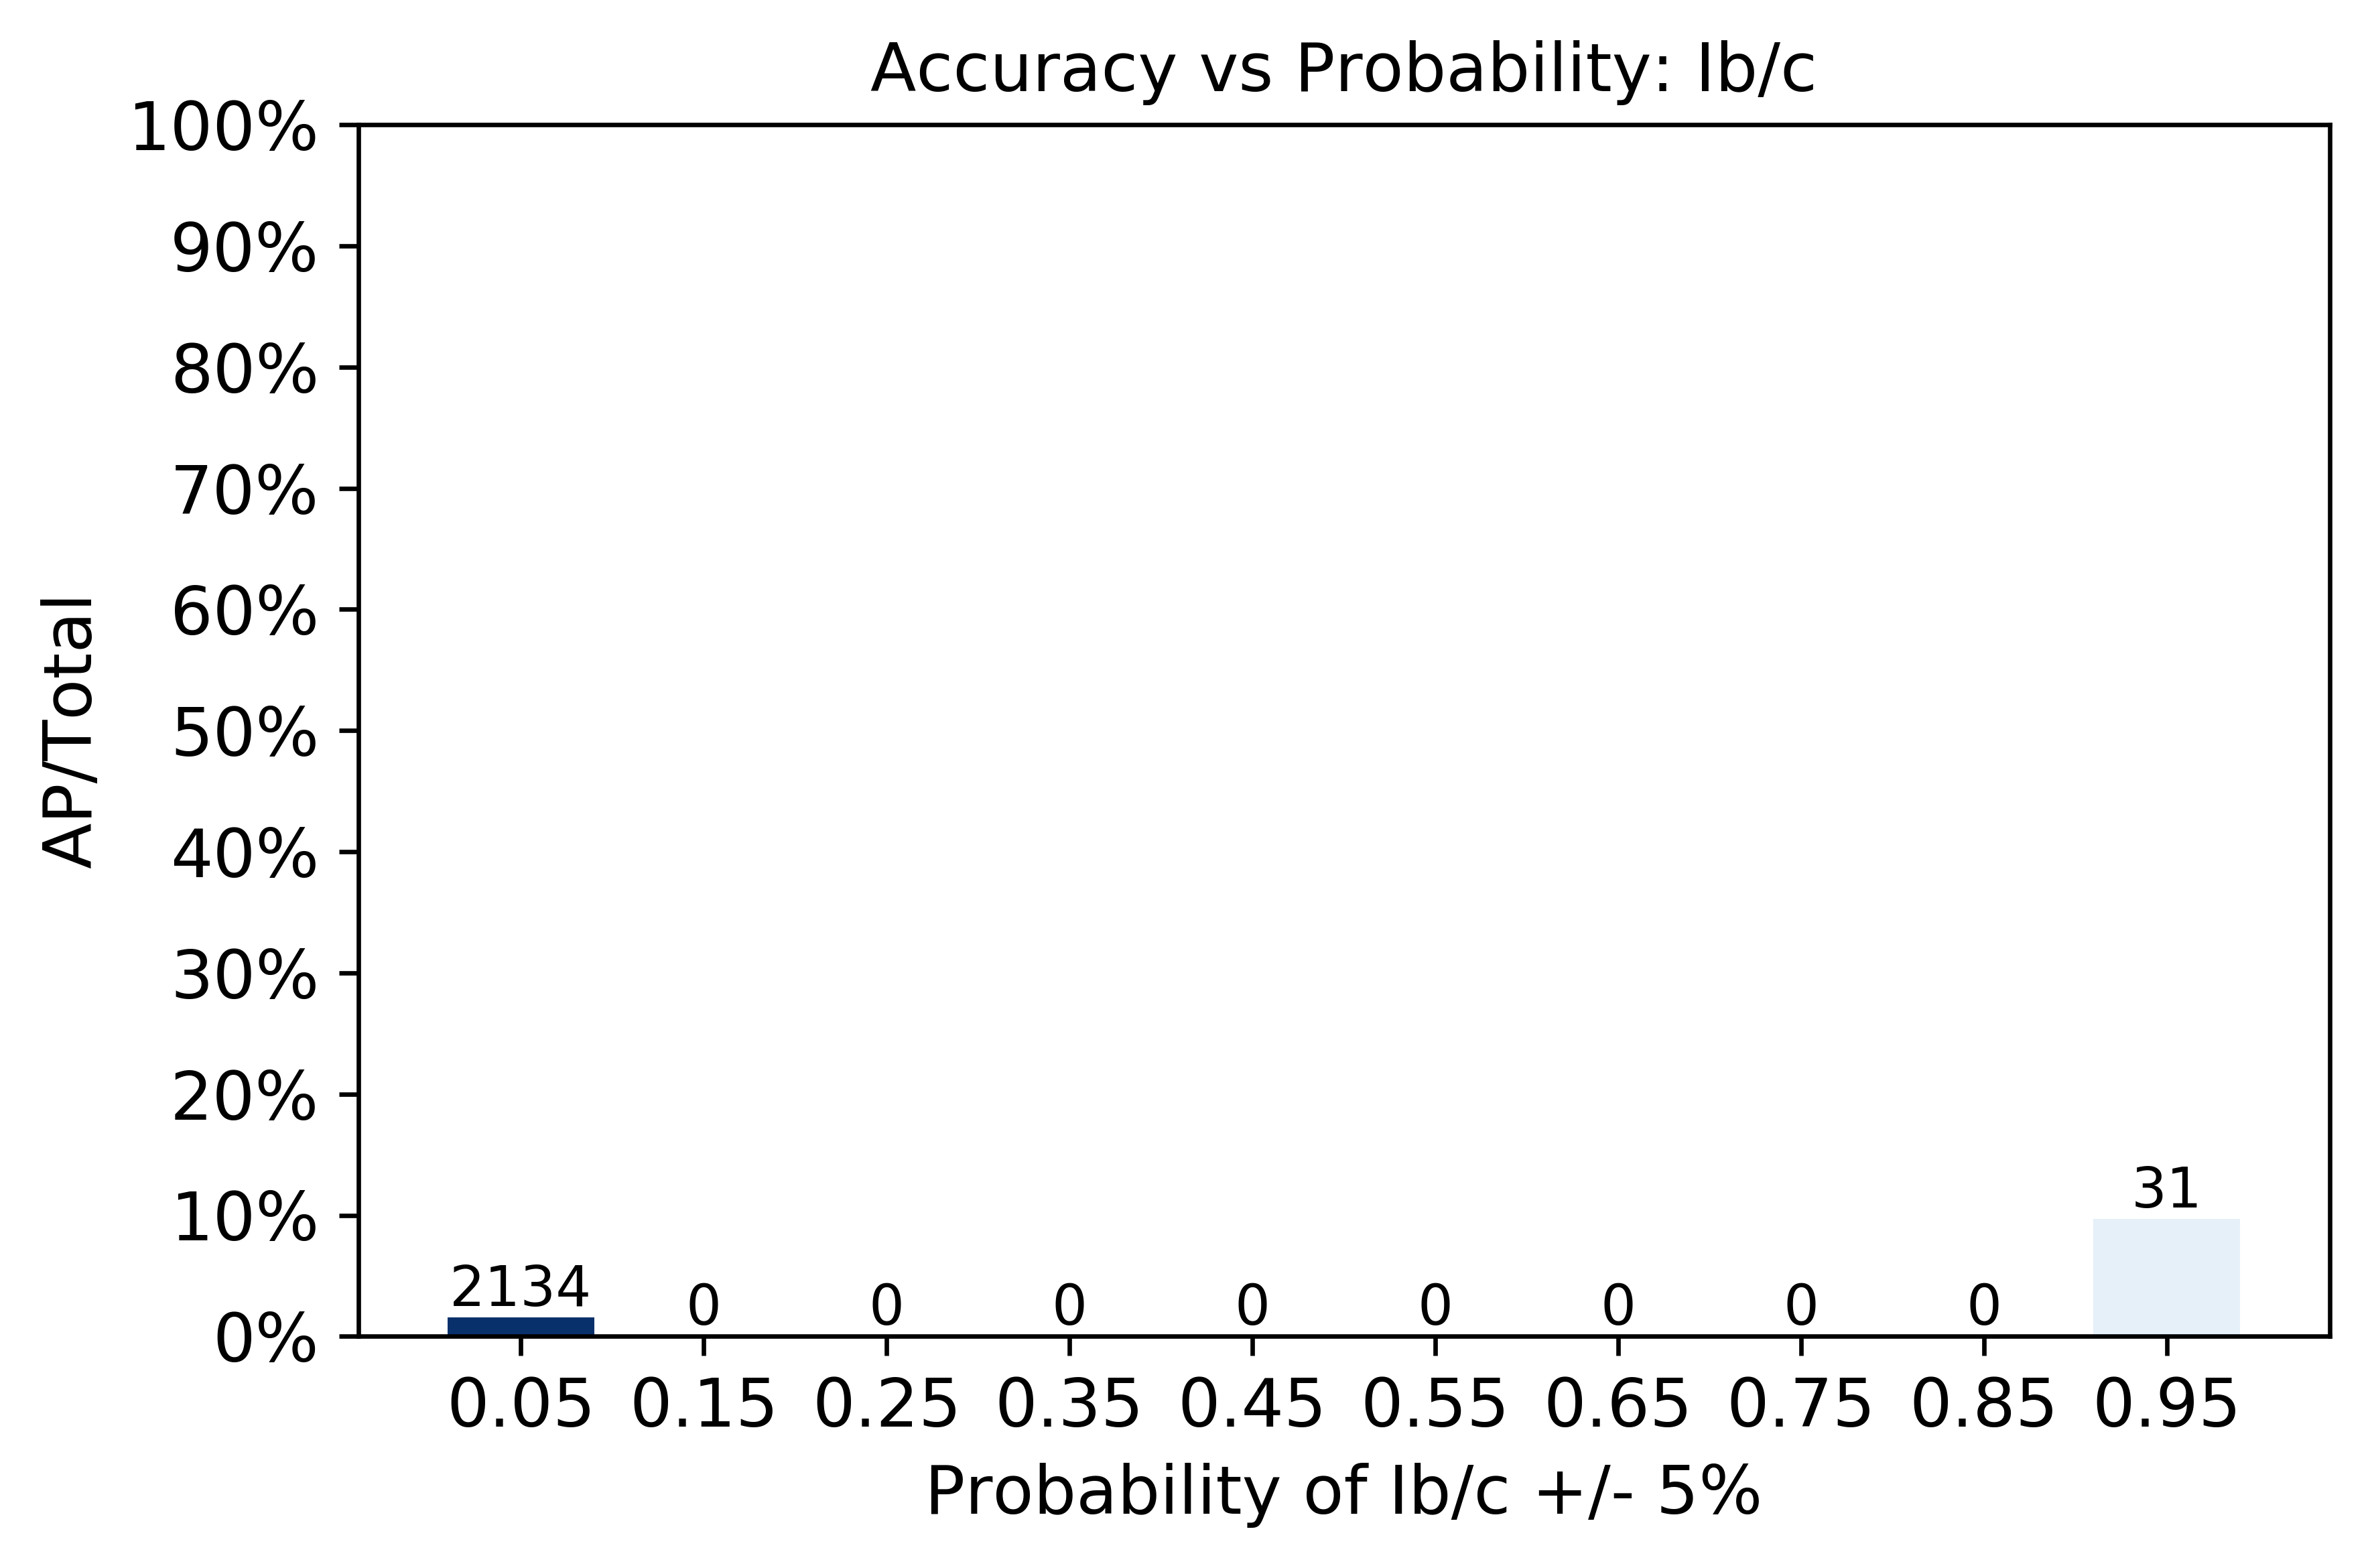

K-Trees Model took 1.5666666666666667 minutes to run 


In [2]:
from models.ktrees_model.ktrees_model import KTreesModel
from datetime import datetime
import time
%matplotlib inline 
# import warnings
# warnings.filterwarnings('ignore')

# Features to be used
mag_cols = ['GALEXAIS_FUV', 'GALEXAIS_NUV', # GALEX
            'AllWISE_W1mag', 'AllWISE_W2mag', 'AllWISE_W3mag',  'AllWISE_W4mag', # AllWISE
            'PS1_gmag', 'PS1_rmag', 'PS1_imag' , 'PS1_zmag', 'PS1_ymag' #Pan-STARRS
           ]
start_time = datetime.now() # for recording run-time

#Instantiate model
ktree = KTreesModel(
         cols = mag_cols,
         transform_features = True,
         incl_redshift = True,
         num_runs = 1,
         min_class_size = 6,
         folds = 3,
         test_level = 3
#          top_classes = 5
         )
ktree.run_model()


end_time = datetime.now()
mins = int(time.mktime(end_time.timetuple()) -
           time.mktime(start_time.timetuple())) / 60
print(ktree.name + " took " + str(mins) + " minutes to run ")
